In [1]:
#### HSC Comparison Analysis ####
library(ArchR)
library(BSgenome.Hsapiens.UCSC.hg38)
set.seed(1)

# Setup threads
threads <- parallel::detectCores() - 1
addArchRThreads(threads = threads)
addArchRLocking(FALSE)
addArchRGenome("hg38")


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
# Load project with peaks
proj <- loadArchRProject("ArchR_Collab_vs_Pub_Peaks")

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [3]:
# Verify project loaded correctly
cat("\n=== Project Summary ===\n")
print(proj)

# Check available metadata
cat("\n=== Available Cell Metadata ===\n")
print(colnames(getCellColData(proj)))

# Check tissue and cell type distribution
cat("\n=== Cells by Tissue ===\n")
print(table(proj$Tissue))

cat("\n=== Cells by Unified Cell Type ===\n")
print(table(proj$CellType_Unified))

cat("\n=== Cells by Tissue_CellType ===\n")
print(table(proj$Tissue_CellType))


=== Project Summary ===



           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /work/project/ladcol_013/bt-atac/notebooks/1_processing/test/ArchR_Collab_vs_Pub_Peaks 
samples(5): collab_0 granja_D8T1 collab_1 granja_D9T1 granja_D7T1
sampleColData names(1): ArrowFiles
cellColData names(21): Sample TSSEnrichment ... ReadsInPeaks FRIP
numberOfCells(1): 15868
medianTSS(1): 14.798
medianFrags(1): 18022.5

=== Available Cell Metadata ===
 [1] "Sample"            "TSSEnrichment"     "ReadsInTSS"       
 [4] "ReadsInPromoter"   "ReadsInBlacklist"  "PromoterRatio"    
 [7] "PassQC"            "NucleosomeRatio"   "nMultiFrags"      
[10] "nMonoFrags"        "nFrags"            "nDiFrags"         
[13] "BlacklistRatio"    "Tissue"            "DoubletScore"     
[16] "DoubletEnrichment" "CellType"          "CellType_Unified" 
[19] "Tissue_CellType"   "ReadsInPeaks"      "FRIP"             

=== Cells by Tissue ===

    BoneMarrow MobilizedBlood 
          9632           6236 

=== Cells by Unified Cell Type ===

 Basophil       CLP      

In [4]:
#===========================================================================
# SUBSET TO HSC ONLY
#===========================================================================

cat("\n=== Subsetting to HSC cells ===\n")

# Get HSC cells
hsc_cells <- getCellNames(proj)[proj$CellType_Unified == "HSC"]
cat("Total HSC cells:", length(hsc_cells), "\n")

# Check HSC distribution by tissue
hsc_tissue <- proj$Tissue[proj$CellType_Unified == "HSC"]
cat("\nHSC cells by tissue:\n")
print(table(hsc_tissue))

# Create HSC-only project
proj_hsc <- subsetArchRProject(
  ArchRProj = proj,
  cells = hsc_cells,
  dropCells = TRUE,
  outputDirectory = "ArchR_HSC_Only",
  force = TRUE
)

cat("\n=== HSC Project Summary ===\n")
cat("Number of cells:", length(getCellNames(proj_hsc)), "\n")
cat("Number of samples:", length(unique(proj_hsc$Sample)), "\n")
cat("Samples:", paste(unique(proj_hsc$Sample), collapse = ", "), "\n")
cat("Tissues:", paste(unique(proj_hsc$Tissue), collapse = ", "), "\n")

# Save HSC-only project
saveArchRProject(proj_hsc, load = FALSE)


=== Subsetting to HSC cells ===
Total HSC cells: 5063 

HSC cells by tissue:
hsc_tissue
    BoneMarrow MobilizedBlood 
          1303           3760 


Copying ArchRProject to new outputDirectory : /work/project/ladcol_013/bt-atac/notebooks/1_processing/test/ArchR_HSC_Only

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 11): collab_0

Copying Other Files (2 of 11): collab_1

Copying Other Files (3 of 11): Embeddings

Copying Other Files (4 of 11): granja_D7T1

Copying Other Files (5 of 11): granja_D8T1

Copying Other Files (6 of 11): granja_D9T1

Copying Other Files (7 of 11): GroupCoverages

Copying Other Files (8 of 11): IterativeLSI_Peaks

Copying Other Files (9 of 11): IterLSI1

Copying Other Files (10 of 11): PeakCalls

Copying Other Files (11 of 11): Plots

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                    


=== HSC Project Summary ===
ror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send e

Saving ArchRProject...



In [5]:
cat("\n=== Recomputing IterativeLSI for HSC subset ===\n")

# Recompute LSI specifically for HSC population
proj_hsc <- addIterativeLSI(
  ArchRProj = proj_hsc,
  useMatrix = "TileMatrix",
  name = "IterativeLSI",
  force = TRUE
)


=== Recomputing IterativeLSI for HSC subset ===


Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-b34f2d8827c4-Date-2026-01-20_Time-23-07-35.072214.log
If there is an issue, please report to github with logFile!

2026-01-20 23:07:36.016299 : Computing Total Across All Features, 0.004 mins elapsed.

2026-01-20 23:07:41.472819 : Computing Top Features, 0.095 mins elapsed.

###########
2026-01-20 23:07:42.850285 : Running LSI (1 of 2) on Top Features, 0.118 mins elapsed.
###########

2026-01-20 23:07:42.876706 : Creating Partial Matrix, 0.119 mins elapsed.

2026-01-20 23:08:00.941686 : Computing LSI, 0.42 mins elapsed.

2026-01-20 23:09:28.757725 : Identifying Clusters, 1.883 mins elapsed.

2026-01-20 23:09:44.320213 : Identified 6 Clusters, 2.143 mins elapsed.

2026-01-20 23:09:44.364788 : Saving LSI Iteration, 2.144 mins elapsed.

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.
ℹ The deprecated feature was likely used in t

In [6]:
proj_hsc <- addHarmony(
  ArchRProj = proj_hsc,
  reducedDims = "IterativeLSI",
  name = "Harmony_Sample_Analysis",
  groupBy = "Sample",
  force = TRUE
)

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



In [7]:
# UMAP without batch correction
proj_hsc <- addUMAP(
  ArchRProj = proj_hsc,
  reducedDims = "IterativeLSI",
  name = "UMAP_LSI",
  nNeighbors = 30,
  minDist = 0.5,
  metric = "cosine",
  force = TRUE
)

# UMAP with batch correction by Sample (Harmony)
proj_hsc <- addUMAP(
  ArchRProj = proj_hsc,
  reducedDims = "Harmony_Sample_Analysis",
  name = "UMAP_Harmony_Sample",
  nNeighbors = 30,
  minDist = 0.5,
  metric = "cosine",
  force = TRUE
)

23:11:37 UMAP embedding parameters a = 0.583 b = 1.334

23:11:37 Read 5063 rows and found 30 numeric columns

23:11:37 Using Annoy for neighbor search, n_neighbors = 30

23:11:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:11:38 Writing NN index file to temp file /tmp/RtmpWXfVXq/fileb34f1877879

23:11:38 Searching Annoy index using 32 threads, search_k = 3000

23:11:38 Annoy recall = 100%

23:11:39 Commencing smooth kNN distance calibration using 32 threads
 with target n_neighbors = 30

23:11:40 Initializing from normalized Laplacian + noise (using RSpectra)

23:11:40 Commencing optimization for 500 epochs, with 237308 positive edges

23:11:40 Using rng type: pcg

23:11:57 Optimization finished

23:11:57 Creating temp model dir /tmp/RtmpWXfVXq/dirb34f16f1725

2

In [8]:
# Create plots directory
plots_dir <- file.path(proj_hsc@projectMetadata$outputDirectory, "Plots")
if(!dir.exists(plots_dir)) dir.create(plots_dir, recursive = TRUE)

In [9]:
proj_hsc <- addImputeWeights(proj_hsc, reducedDims = "Harmony_Sample_Analysis")

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-b34f172791a3-Date-2026-01-20_Time-23-12-19.654554.log
If there is an issue, please report to github with logFile!

2026-01-20 23:12:20.119569 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.




=== Plotting on UMAP_LSI ===


Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b34f233d751a-Date-2026-01-20_Time-23-12-29.674148.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2026-01-20 23:12:30.434163 : 



Imputing Matrix

Using weights on disk

1 of 1

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b34f233d751a-Date-2026-01-20_Time-23-12-29.674148.log



Saved: UMAP_HSC_CD34.png 
rerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs


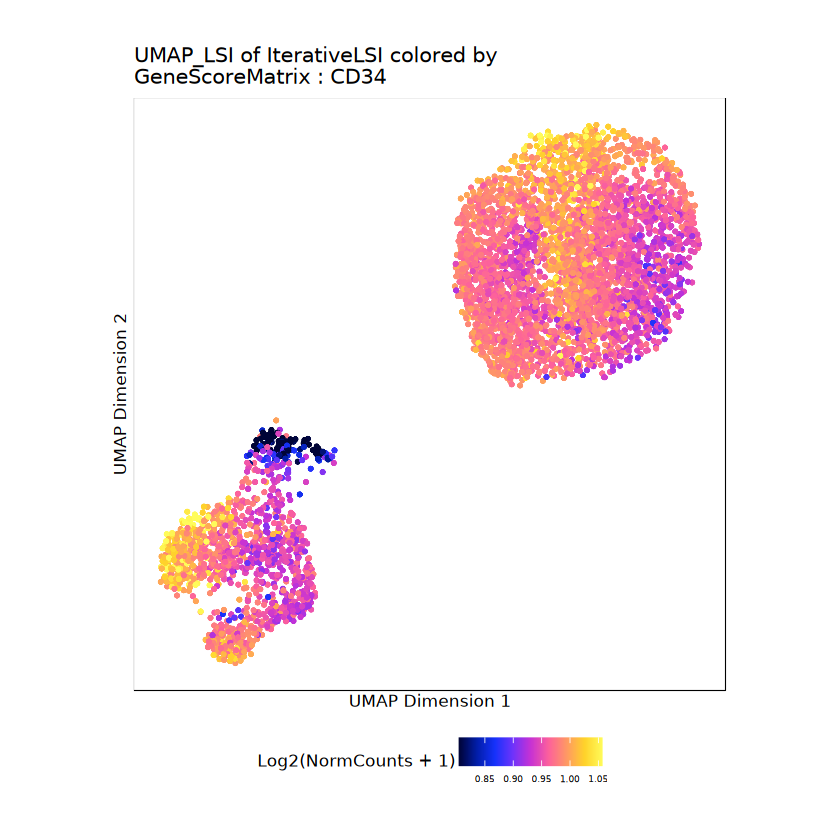

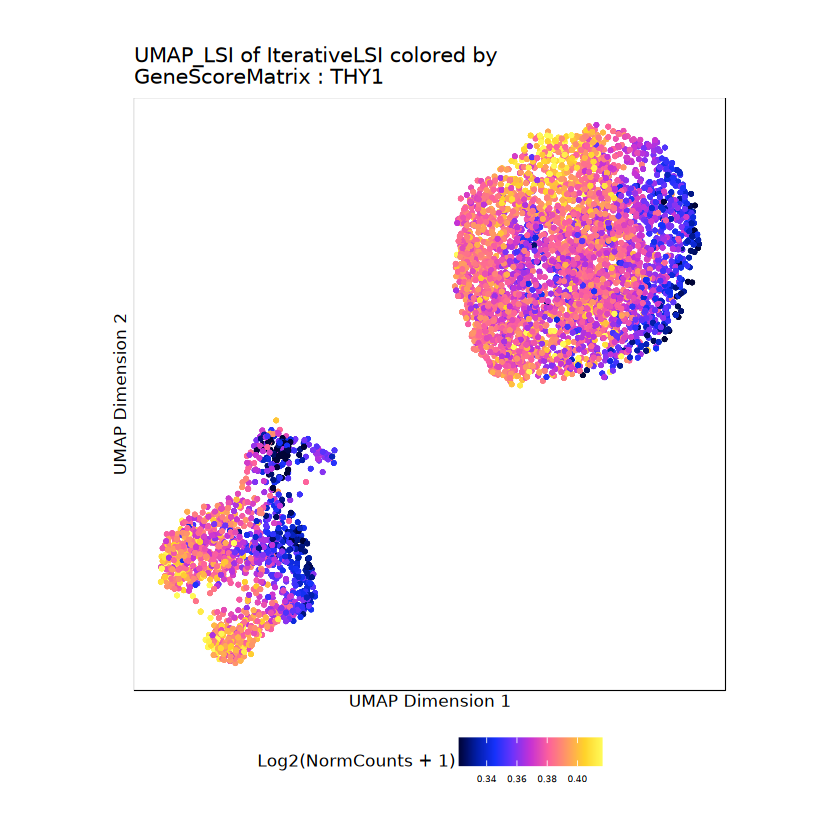

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b34fb15b163-Date-2026-01-20_Time-23-12-45.438448.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b34fb15b163-Date-2026-01-20_Time-23-12-45.438448.log



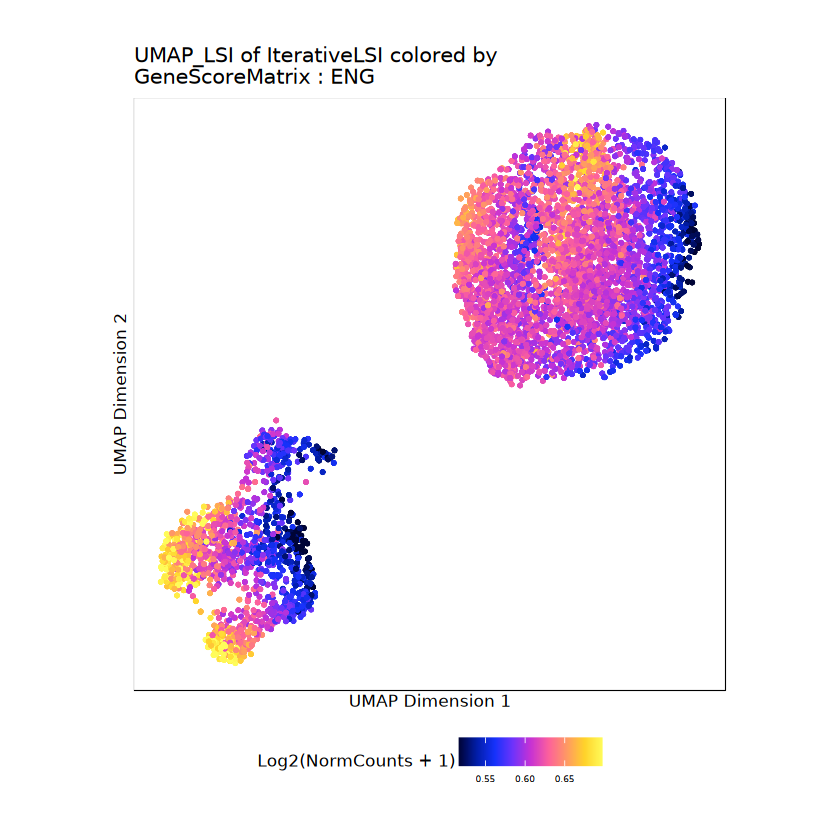

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b34f2ef6cd56-Date-2026-01-20_Time-23-12-50.695944.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2026-01-20 23:12:51.584143 : 



Imputing Matrix

Using weights on disk

1 of 1

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b34f2ef6cd56-Date-2026-01-20_Time-23-12-50.695944.log



D34_corrected.png 
terbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs


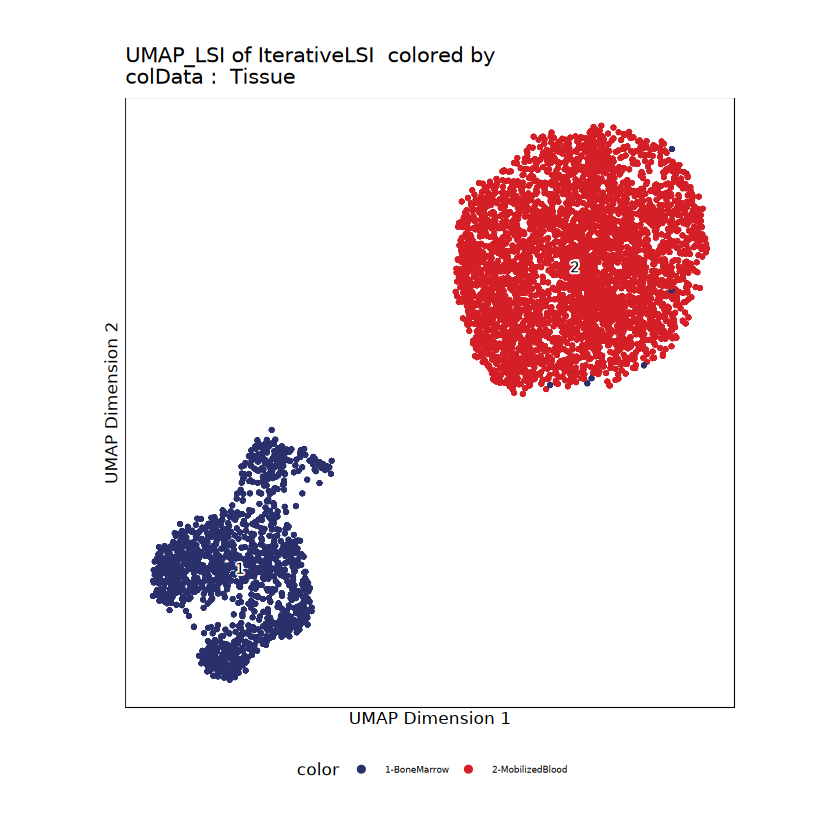

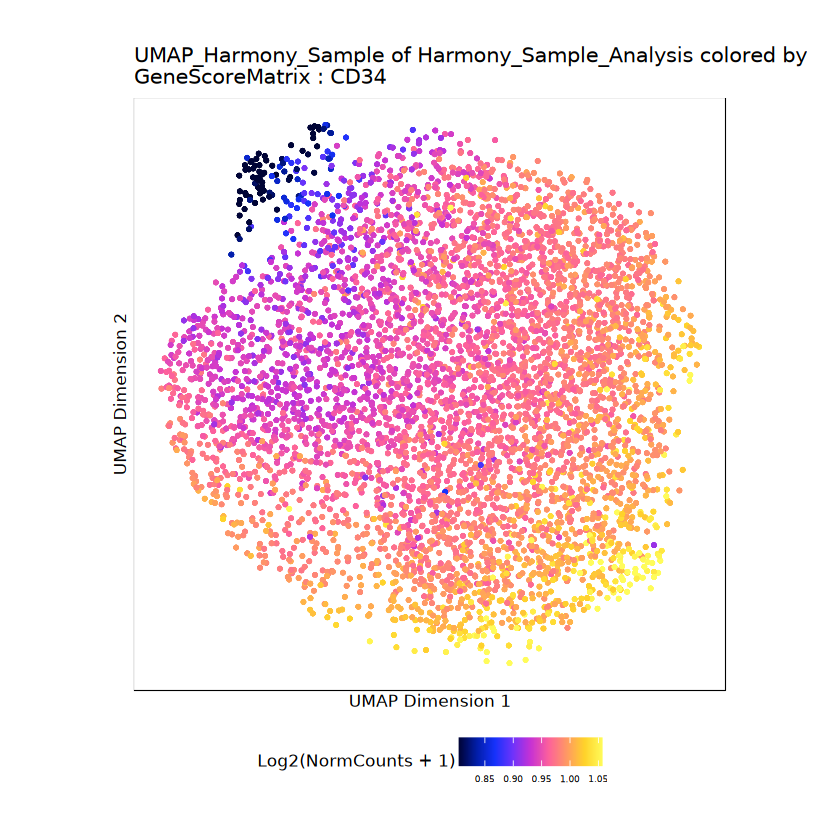

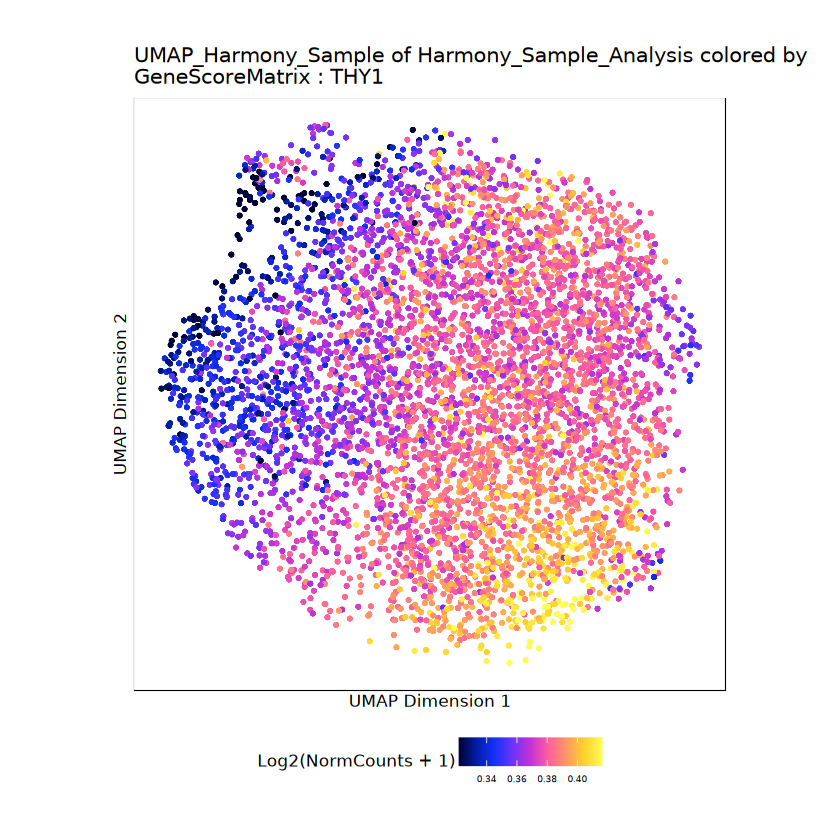

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b34f41bbd797-Date-2026-01-20_Time-23-13-09.984021.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b34f41bbd797-Date-2026-01-20_Time-23-13-09.984021.log



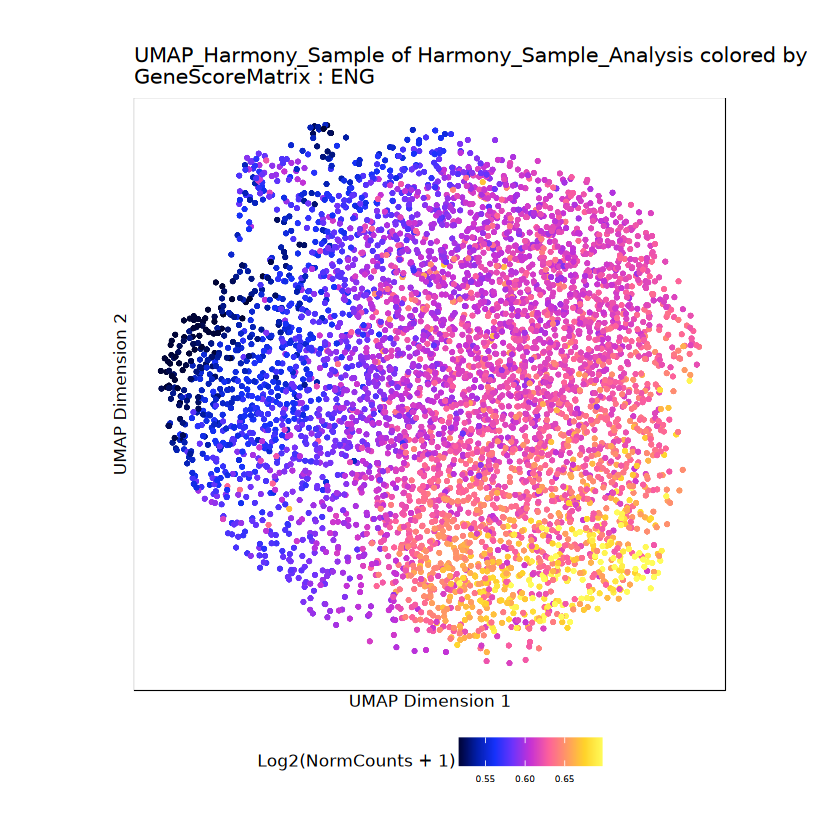

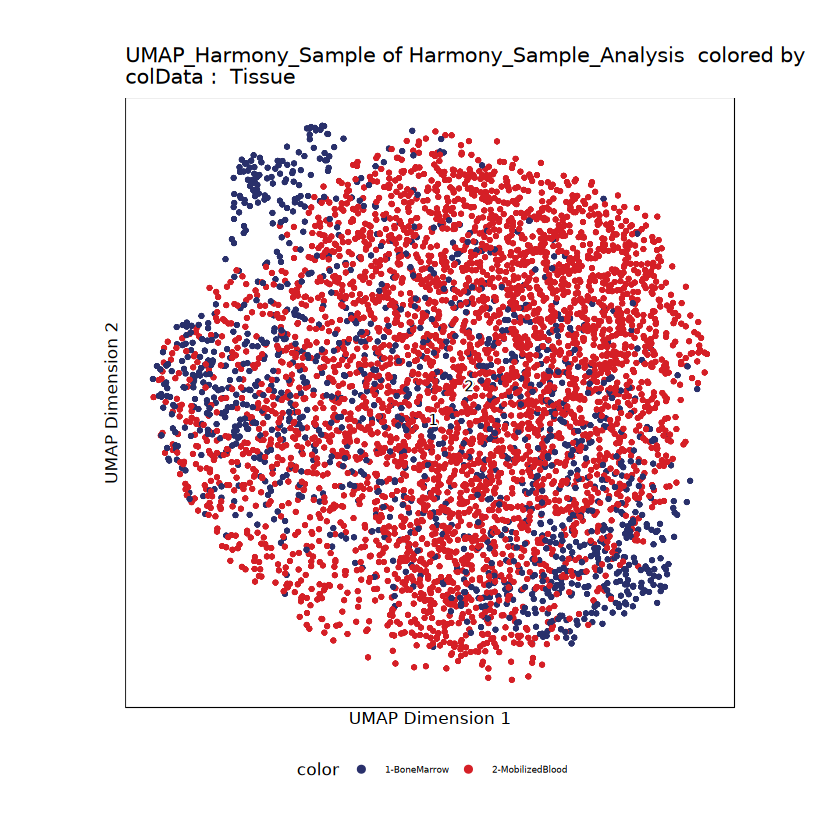

In [10]:
#===========================================================================
# MARKER GENES & TISSUE PLOTS
#===========================================================================
library(ggplot2)

# Setup
plots_dir <- file.path(proj_hsc@projectMetadata$outputDirectory, "Plots")
if(!dir.exists(plots_dir)) dir.create(plots_dir, recursive = TRUE)

hsc_markers <- c("CD34", "THY1", "ENG")

tissue_colors <- c(
  "BoneMarrow" = "#29306B",
  "MobilizedBlood" = "#D51F26"
)

# Define embeddings and filename suffixes
embeddings <- c(
  "UMAP_LSI"            = "",
  "UMAP_Harmony_Sample" = "_corrected"
)

# Loop over embeddings
for (emb in names(embeddings)) {
  suffix <- embeddings[emb]
  cat("\n=== Plotting on", emb, "===\n")
  
  # --- Gene Score Plots ---
  p_genes <- plotEmbedding(
    ArchRProj = proj_hsc,
    colorBy   = "GeneScoreMatrix",
    name      = hsc_markers,
    embedding = emb,
    plotAs    = "points",
    size      = 1.5,
    quantCut  = c(0.01, 0.99)
  )
  
  for (i in seq_along(p_genes)) {
    gene_name <- hsc_markers[i]
    filename <- file.path(plots_dir, paste0("UMAP_HSC_", gene_name, suffix, ".png"))
    tryCatch({
      ggsave(filename = filename, plot = p_genes[[i]], width = 5, height = 5)
      cat("Saved:", basename(filename), "\n")
    }, error = function(e) cat("Failed:", gene_name, "-", e$message, "\n"))
    print(p_genes[[i]])
  }
  
  # --- Tissue Plot ---
  p_tissue <- plotEmbedding(
    ArchRProj = proj_hsc,
    colorBy   = "cellColData",
    name      = "Tissue",
    embedding = emb,
    plotAs    = "points",
    size      = 1.5,
    pal       = tissue_colors
  )
  
  filename_tissue <- file.path(plots_dir, paste0("UMAP_HSC_By_Tissue", suffix, ".png"))
  ggsave(filename = filename_tissue, plot = p_tissue, width = 6, height = 6)
  print(p_tissue)
  cat("Saved:", basename(filename_tissue), "\n")
}

# HSC-Differential: BoneMarrow vs. MobilizedBlood

In [11]:
# Get marker peaks between tissues
markersPeaks <- getMarkerFeatures(
  ArchRProj = proj_hsc,
  useMatrix = "PeakMatrix",
  groupBy = "Tissue",
  testMethod = "wilcoxon",
  bias = c("TSSEnrichment", "log10(nFrags)"),
  useGroups = "MobilizedBlood",
  bgdGroups = "BoneMarrow"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-b34f69ee2eda-Date-2026-01-20_Time-23-13-15.794703.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2026-01-20 23:13:16.827282 : Matching Known Biases, 0.01 mins elapsed.

2026-01-20 23:13:19.612108 : Computing Pairwise Tests (1 of 1), 0.057 mins elapsed.

Pairwise Test MobilizedBlood : Seqnames chr1

Pairwise Test MobilizedBlood : Seqnames chr10

Pairwise Test MobilizedBlood : Seqnames chr11

Pairwise Test MobilizedBlood : Seqnames chr12

Pairwise Test MobilizedBlood : Seqnames chr13

Pairwise Test MobilizedBlood : Seqnames chr14

Pairwise Test MobilizedBlood : Seqnames chr15

Pairwise Test MobilizedBlood : Seqnames chr16

Pairwise Test MobilizedBlood : Seqnames chr17

Pairwise Test MobilizedBlood : Seqnames chr18

Pairwise Test MobilizedBlood : Seqnames chr19

Pairwise Test MobilizedBlood : Seqnames chr2

Pairwise Test MobilizedBlood : Seqnames chr20

Pairwise Test MobilizedBlood 


PEAK ACCESSIBILITY SUMMARY
Total peaks analyzed: 281831
Significant MobilizedBlood-enriched (FDR≤0.05, Log2FC≥0.5): 32018
Significant BoneMarrow-enriched (FDR≤0.05, Log2FC≤-0.5): 2370
Significant with |Log2FC|<0.5 (FDR≤0.05, |Log2FC|<0.5): 19241
Non-significant (FDR>0.05): 237607


Warning message:
“Removed 223 rows containing missing values or values outside the scale range (`geom_point_rast()`).”
Warning message:
“Removed 223 rows containing missing values or values outside the scale range (`geom_point_rast()`).”



=== Peak files exported ===
- Peaks_SIGNIFICANT_MobilizedBlood.csv
- Peaks_SIGNIFICANT_BoneMarrow.csv
- Peaks_MA_Plot.pdf
- Peaks_Volcano_Plot.pdf


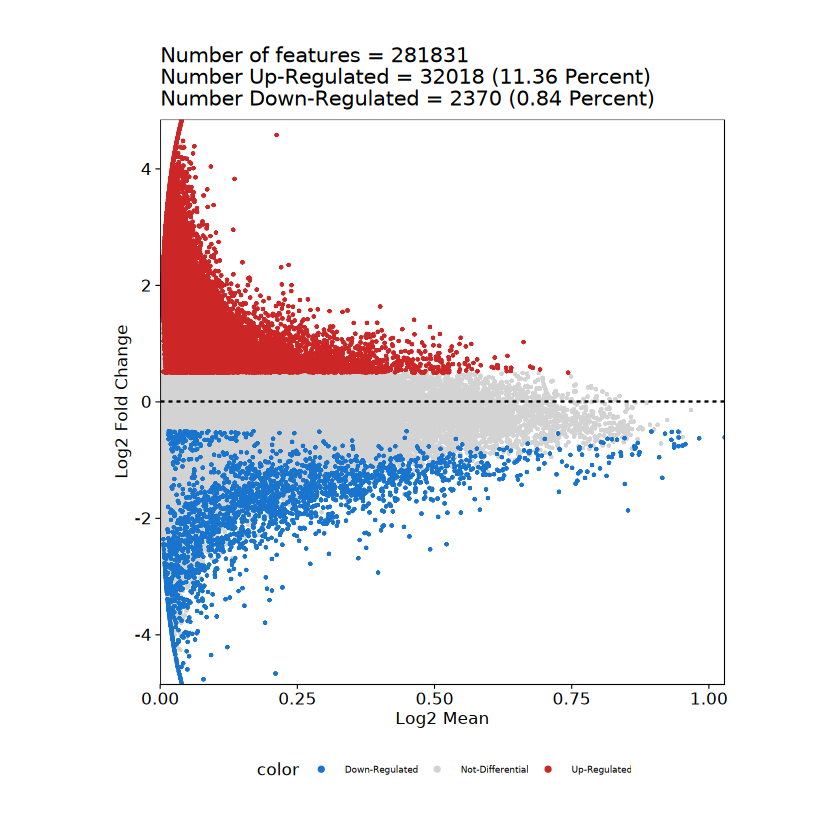

In [12]:
#===========================================================================
# PEAK ACCESSIBILITY ANALYSIS - COMPLETE WITH RAW VALUES
#===========================================================================

# Define cutoffs
fdr_cutoff <- 0.05
log2fc_cutoff <- 0.5

# Extract all assays from markersPeaks
peakInfo <- as.data.frame(rowData(markersPeaks))
peaks_all <- cbind(peakInfo, data.frame(
  Mean_MobilizedBlood = assay(markersPeaks, "Mean")[,1],
  Mean_BoneMarrow = assay(markersPeaks, "MeanBGD")[,1],
  Log2FC = assay(markersPeaks, "Log2FC")[,1],
  FDR = assay(markersPeaks, "FDR")[,1],
  MeanDiff = assay(markersPeaks, "MeanDiff")[,1],
  AUC = assay(markersPeaks, "AUC")[,1]
))

# Categorize peaks
sig_mb_peaks <- peaks_all[peaks_all$FDR < fdr_cutoff & peaks_all$Log2FC > log2fc_cutoff, ]
sig_bm_peaks <- peaks_all[peaks_all$FDR < fdr_cutoff & peaks_all$Log2FC < -log2fc_cutoff, ]
shared_peaks <- peaks_all[peaks_all$FDR < fdr_cutoff & abs(peaks_all$Log2FC) < log2fc_cutoff, ]
nonsig_peaks <- peaks_all[peaks_all$FDR > fdr_cutoff, ]

cat("\n==================================================\n")
cat("PEAK ACCESSIBILITY SUMMARY\n")
cat("==================================================\n")
cat(sprintf("Total peaks analyzed: %d\n", nrow(peaks_all)))
cat(sprintf("Significant MobilizedBlood-enriched (FDR≤%.2f, Log2FC≥%g): %d\n", 
            fdr_cutoff, log2fc_cutoff, nrow(sig_mb_peaks)))
cat(sprintf("Significant BoneMarrow-enriched (FDR≤%.2f, Log2FC≤-%g): %d\n", 
            fdr_cutoff, log2fc_cutoff, nrow(sig_bm_peaks)))
cat(sprintf("Significant with |Log2FC|<0.5 (FDR≤%.2f, |Log2FC|<%g): %d\n", 
            fdr_cutoff, log2fc_cutoff, nrow(shared_peaks)))
cat(sprintf("Non-significant (FDR>%.2f): %d\n", fdr_cutoff, nrow(nonsig_peaks)))

#===========================================================================
# PEAK PLOTS
#===========================================================================
plots_dir <- file.path(proj_hsc@projectMetadata$outputDirectory, "Plots")
if(!dir.exists(plots_dir)) dir.create(plots_dir, recursive = TRUE)

pMA_peaks <- plotMarkers(seMarker = markersPeaks, 
                         name = "MobilizedBlood", 
                         cutOff = "FDR < 0.05 & abs(Log2FC) > 0.5", 
                         plotAs = "MA")
ggsave(file.path(plots_dir, "Peaks_MA_Plot.pdf"), pMA_peaks, width = 5, height = 5)
print(pMA_peaks)

#===========================================================================
# EXPORT PEAK LISTS
#===========================================================================
write.csv(sig_mb_peaks, file.path(plots_dir, "Peaks_SIGNIFICANT_MobilizedBlood.csv"), row.names = FALSE)
write.csv(sig_bm_peaks, file.path(plots_dir, "Peaks_SIGNIFICANT_BoneMarrow.csv"), row.names = FALSE)

cat("\n=== Peak files exported ===\n")
cat("- Peaks_SIGNIFICANT_MobilizedBlood.csv\n")
cat("- Peaks_SIGNIFICANT_BoneMarrow.csv\n")
cat("- Peaks_MA_Plot.pdf\n")
cat("- Peaks_Volcano_Plot.pdf\n")

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualizati

agg_record_397734157 
                   2

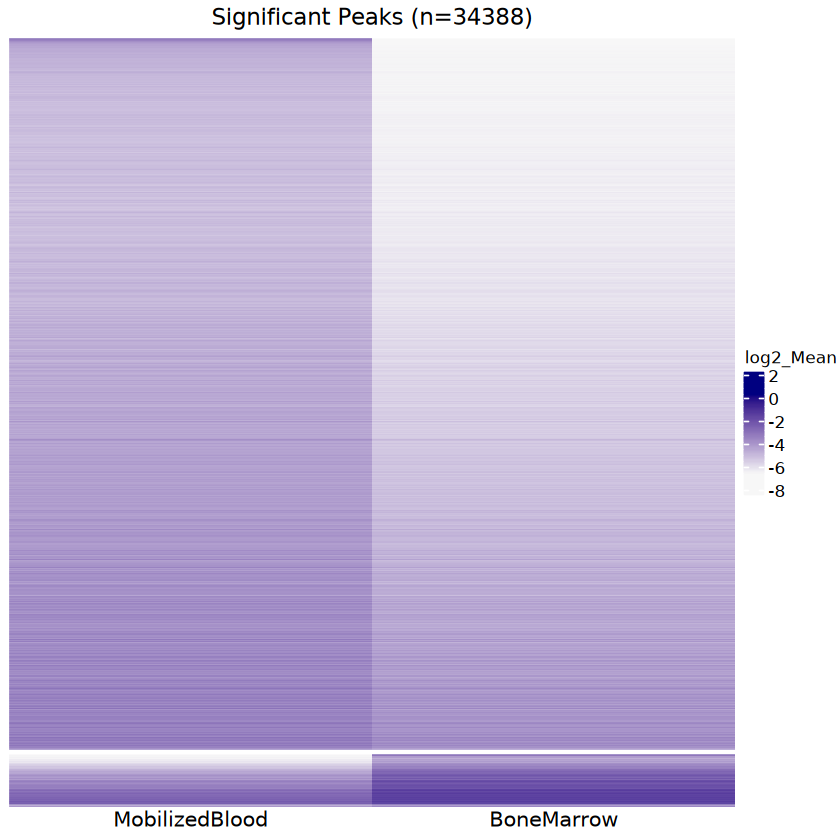

In [13]:
library(ComplexHeatmap)
library(circlize)

#===========================================================================
# HEATMAP - SIGNIFICANT PEAKS
#===========================================================================

# 1. Prepare Data
# --------------------------------------------------------------------------
# Combine significant peaks
sig_peaks_all <- rbind(
  cbind(sig_mb_peaks, Direction = "MobilizedBlood"),
  cbind(sig_bm_peaks, Direction = "BoneMarrow")
)

# Sort by absolute Log2FC (strongest difference first)
sig_peaks_all <- sig_peaks_all[order(abs(sig_peaks_all$Log2FC), decreasing = TRUE), ]

# Create peak ID for row names
sig_peaks_all$peakID <- paste0(sig_peaks_all$seqnames, ":", sig_peaks_all$start, "-", sig_peaks_all$end)

# Create matrix with raw mean values
peak_mat <- as.matrix(sig_peaks_all[, c("Mean_MobilizedBlood", "Mean_BoneMarrow")])
rownames(peak_mat) <- sig_peaks_all$peakID
colnames(peak_mat) <- c("MobilizedBlood", "BoneMarrow")

# Log2 transform (using +1 to keep values positive)
peak_mat_log <- log2(peak_mat + 0.01)

# 2. Define Color Scheme
# --------------------------------------------------------------------------
peak_min <- min(peak_mat_log, na.rm = TRUE)
peak_max <- max(peak_mat_log, na.rm = TRUE)

peak_col_fun <- colorRamp2(c(peak_min, peak_max), c("grey97", "navy"))
# 3. Create Heatmap
# --------------------------------------------------------------------------
ht_peaks <- Heatmap(
  peak_mat_log,
  name = "log2_Mean",
  
  # Clustering & Order
  cluster_rows = FALSE,
  cluster_columns = FALSE,
  
  # Split rows by group
  row_split = factor(sig_peaks_all$Direction, levels = c("MobilizedBlood", "BoneMarrow")),
  row_title = NULL, 
  
  # Text labels
  show_row_names = FALSE,
  column_names_gp = gpar(fontsize = 12),
    column_names_centered = TRUE,

    column_names_rot = 0,
  
  # Colors
  col = peak_col_fun,
  
  # Titles
  column_title = paste0("Significant Peaks (n=", nrow(peak_mat), ")"),
  
  # Rendering optimization
  use_raster = TRUE,
  raster_quality = 3
)

# 4. Save
# --------------------------------------------------------------------------
pdf(file.path(plots_dir, "Peaks_Heatmap_Clean_NoLabels.pdf"), width = 5, height = 6)
draw(ht_peaks)
dev.off()

# Display in Viewer
grid::grid.newpage()
draw(ht_peaks)

In [ ]:
#===========================================================================
# MOTIF ANALYSIS - COMPLETE WITH ALL VALUES
#===========================================================================
proj_hsc <- addMotifAnnotations(ArchRProj = proj_hsc, motifSet = "cisbp", name = "Motif", force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-b34f71fb9ee8-Date-2026-01-20_Time-23-15-24.97422.log
If there is an issue, please report to github with logFile!

2026-01-20 23:15:31.54044 : Getting Motif Set, Species : Homo sapiens, 0.009 mins elapsed.

Using version 2 motifs!

2026-01-20 23:15:35.008926 : Finding Motif Positions with motifmatchr!, 0.067 mins elapsed.



2026-01-20 23:24:02.383641 : Computing Enrichments 1 of 1, 0.234 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-peakAnnoEnrichment-b34fe743a91-Date-2026-01-20_Time-23-23-48.326167.log




MOTIF ENRICHMENT SUMMARY
Motifs in MB-enriched peaks: 870 total, 174 significant (padj<0.05)
Motifs in BM-enriched peaks: 870 total, 133 significant (padj<0.05)

=== MOTIFS (MobilizedBlood) - TOP 25 ===
            TF mlog10Padj Enrichment nCompare nBackground
644   MBD2_644  500.53556   2.136212    32018      281831
866  SMAD5_866  566.98456   2.097327    32018      281831
850 ZFP161_850  247.92776   2.089992    32018      281831
301  DNMT1_301  635.76436   2.054332    32018      281831
645  MECP2_645  366.94596   1.929920    32018      281831
203  ZBTB1_203  100.57936   1.824930    32018      281831
195   EGR1_195  565.21286   1.806033    32018      281831
318   E2F4_318  253.15466   1.800199    32018      281831
311   E2F2_311   48.51356   1.765025    32018      281831
315   E2F5_315   42.00516   1.713990    32018      281831
196   EGR2_196  197.59426   1.696591    32018      281831
2     TFAP2D_2  644.28666   1.684192    32018      281831
165   KLF6_165  453.85716   1.672834    32

Warning message:
“ggrepel: 14 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 20 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


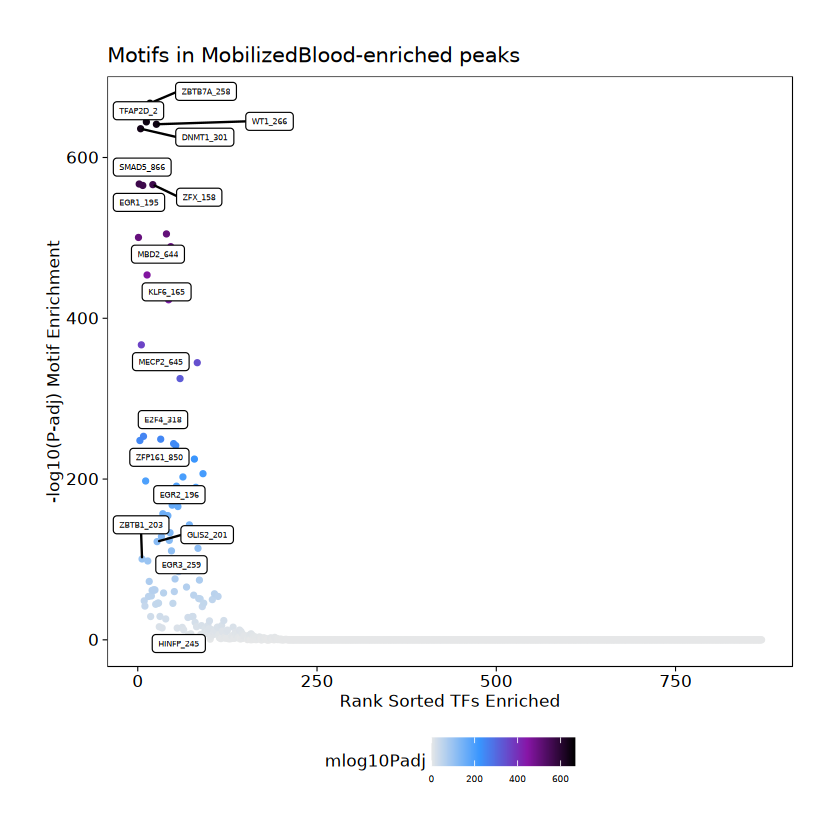


=== Motif files exported ===
- Motifs_ALL_MobilizedBlood.csv
- Motifs_ALL_BoneMarrow.csv
- Motifs_SIGNIFICANT_MobilizedBlood.csv
- Motifs_SIGNIFICANT_BoneMarrow.csv
- Motifs_Enrichment_MobilizedBlood.pdf
- Motifs_Enrichment_BoneMarrow.pdf


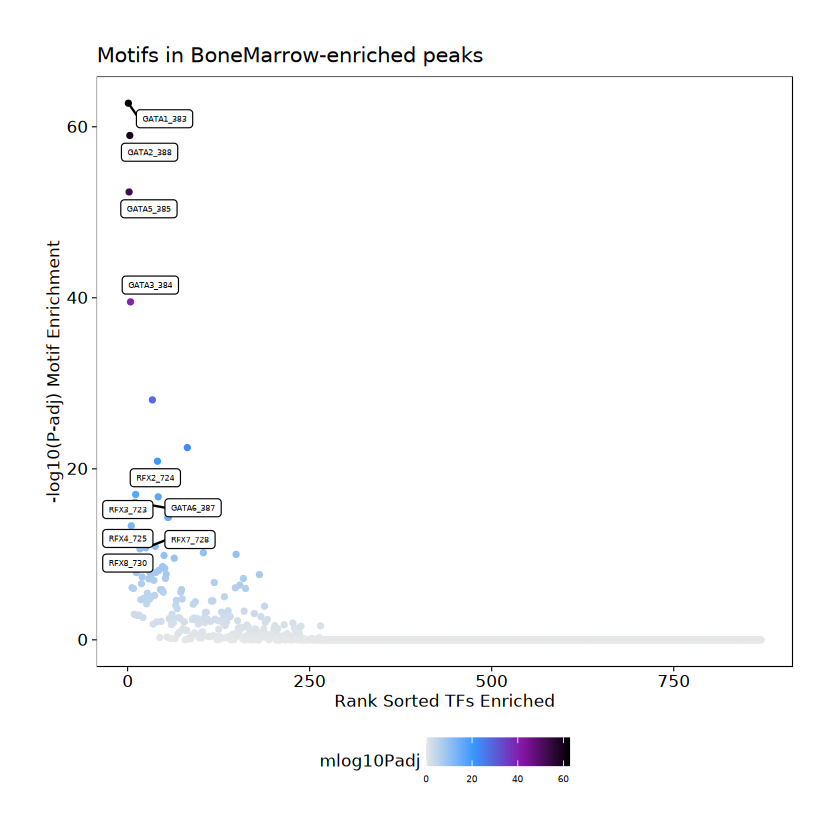

In [15]:
# Define cutoffs (same as genes and peaks)
fdr_cutoff <- 0.05
log2fc_cutoff <- 0.5

# Motifs enriched in MobilizedBlood-accessible peaks
motifsUp <- peakAnnoEnrichment(
  seMarker = markersPeaks,
  ArchRProj = proj_hsc,
  peakAnnotation = "Motif",
  cutOff = "FDR < 0.05 & Log2FC > 0.5"
)

# Extract all available data for MobilizedBlood motifs
df_up <- data.frame(
  TF = rownames(motifsUp),
  mlog10Padj = assay(motifsUp, "mlog10Padj")[,1],
  mlog10p = assay(motifsUp, "mlog10p")[,1],
  Enrichment = assay(motifsUp, "Enrichment")[,1],
  nCompare = assay(motifsUp, "nCompare")[,1],
  CompareProportion = assay(motifsUp, "CompareProportion")[,1],
  CompareFrequency = assay(motifsUp, "CompareFrequency")[,1],
  nBackground = assay(motifsUp, "nBackground")[,1],
  BackgroundProportion = assay(motifsUp, "BackgroundProporition")[,1],
  BackgroundFrequency = assay(motifsUp, "BackgroundFrequency")[,1]
)
df_up <- df_up[order(df_up$Enrichment, decreasing = TRUE), ]
df_up$rank <- seq_len(nrow(df_up))

# Motifs enriched in BoneMarrow-accessible peaks  
motifsDo <- peakAnnoEnrichment(
  seMarker = markersPeaks,
  ArchRProj = proj_hsc,
  peakAnnotation = "Motif",
  cutOff = "FDR < 0.05 & Log2FC < -0.5"
)

# Extract all available data for BoneMarrow motifs
df_do <- data.frame(
  TF = rownames(motifsDo),
  mlog10Padj = assay(motifsDo, "mlog10Padj")[,1],
  mlog10p = assay(motifsDo, "mlog10p")[,1],
  Enrichment = assay(motifsDo, "Enrichment")[,1],
  nCompare = assay(motifsDo, "nCompare")[,1],
  CompareProportion = assay(motifsDo, "CompareProportion")[,1],
  CompareFrequency = assay(motifsDo, "CompareFrequency")[,1],
  nBackground = assay(motifsDo, "nBackground")[,1],
  BackgroundProportion = assay(motifsDo, "BackgroundProporition")[,1],
  BackgroundFrequency = assay(motifsDo, "BackgroundFrequency")[,1]
)
df_do <- df_do[order(df_do$Enrichment, decreasing = TRUE), ]
df_do$rank <- seq_len(nrow(df_do))
motif_sig_cutoff <- -log10(fdr_cutoff)

sig_motifs_mb <- df_up[df_up$mlog10Padj > motif_sig_cutoff, ]
sig_motifs_bm <- df_do[df_do$mlog10Padj > motif_sig_cutoff, ]

cat("\n==================================================\n")
cat("MOTIF ENRICHMENT SUMMARY\n")
cat("==================================================\n")
cat(sprintf("Motifs in MB-enriched peaks: %d total, %d significant (padj<0.05)\n", 
            nrow(df_up), nrow(sig_motifs_mb)))
cat(sprintf("Motifs in BM-enriched peaks: %d total, %d significant (padj<0.05)\n", 
            nrow(df_do), nrow(sig_motifs_bm)))

# Check structure
cat("\n=== MOTIFS (MobilizedBlood) - TOP 25 ===\n")
print(head(df_up[, c("TF", "mlog10Padj", "Enrichment", "nCompare", "nBackground")], 25))

cat("\n=== MOTIFS (BoneMarrow) - TOP 25 ===\n")
print(head(df_do[, c("TF", "mlog10Padj", "Enrichment", "nCompare", "nBackground")], 25))


#===========================================================================
# MOTIF PLOTS
#===========================================================================
plots_dir <- file.path(proj_hsc@projectMetadata$outputDirectory, "Plots")
if(!dir.exists(plots_dir)) dir.create(plots_dir, recursive = TRUE)

ggUp <- ggplot(df_up, aes(rank, mlog10Padj, color = mlog10Padj)) + 
  geom_point(size = 1) +
  ggrepel::geom_label_repel(
    data = df_up[seq_len(min(30, nrow(df_up))), ], 
    aes(x = rank, y = mlog10Padj, label = TF), 
    size = 1.5, nudge_x = 2, color = "black"
  ) + 
  theme_ArchR() + 
  ylab("-log10(P-adj) Motif Enrichment") + 
  xlab("Rank Sorted TFs Enriched") +
  ggtitle("Motifs in MobilizedBlood-enriched peaks") +
  scale_color_gradientn(colors = paletteContinuous(set = "comet"))

ggDo <- ggplot(df_do, aes(rank, mlog10Padj, color = mlog10Padj)) + 
  geom_point(size = 1) +
  ggrepel::geom_label_repel(
    data = df_do[seq_len(min(30, nrow(df_do))), ], 
    aes(x = rank, y = mlog10Padj, label = TF), 
    size = 1.5, nudge_x = 2, color = "black"
  ) + 
  theme_ArchR() + 
  ylab("-log10(P-adj) Motif Enrichment") + 
  xlab("Rank Sorted TFs Enriched") +
  ggtitle("Motifs in BoneMarrow-enriched peaks") +
  scale_color_gradientn(colors = paletteContinuous(set = "comet"))

ggsave(file.path(plots_dir, "Motifs_Enrichment_MobilizedBlood.pdf"), ggUp, width = 8, height = 6)
ggsave(file.path(plots_dir, "Motifs_Enrichment_BoneMarrow.pdf"), ggDo, width = 8, height = 6)

print(ggUp)
print(ggDo)

#===========================================================================
# EXPORT MOTIF LISTS
#===========================================================================
write.csv(df_up, file.path(plots_dir, "Motifs_ALL_MobilizedBlood.csv"), row.names = FALSE)
write.csv(df_do, file.path(plots_dir, "Motifs_ALL_BoneMarrow.csv"), row.names = FALSE)
write.csv(sig_motifs_mb, file.path(plots_dir, "Motifs_SIGNIFICANT_MobilizedBlood.csv"), row.names = FALSE)
write.csv(sig_motifs_bm, file.path(plots_dir, "Motifs_SIGNIFICANT_BoneMarrow.csv"), row.names = FALSE)

cat("\n=== Motif files exported ===\n")
cat("- Motifs_ALL_MobilizedBlood.csv\n")
cat("- Motifs_ALL_BoneMarrow.csv\n")
cat("- Motifs_SIGNIFICANT_MobilizedBlood.csv\n")
cat("- Motifs_SIGNIFICANT_BoneMarrow.csv\n")
cat("- Motifs_Enrichment_MobilizedBlood.pdf\n")
cat("- Motifs_Enrichment_BoneMarrow.pdf\n")

Lade nötiges Paket: futile.logger


Attache Paket: ‘futile.logger’


Das folgende Objekt ist maskiert ‘package:gtools’:

    scat



Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union


Das folgende Objekt ist maskiert ‘package:XVector’:

    slice


Das folgende Objekt ist maskiert ‘package:Biobase’:

    combine


Die folgenden Objekte sind maskiert von ‘package:GenomicRanges’:

    intersect, setdiff, union


Das folgende Objekt ist maskiert ‘package:GenomeInfoDb’:

    intersect


Die folgenden Objekte sind maskiert von ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


Die folgenden Objekte sind maskiert von ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


Die folgenden Objekte sind maskiert von ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


Das folgende Objekt ist maskiert ‘package:matrixStats’:

    count


Die folgenden 

MobilizedBlood unique motifs: 143 
BoneMarrow unique motifs: 132 
Overlap: 42 


agg_record_744554106 
                   2


=== Motifs ONLY in MobilizedBlood ===
  [1] "AHR"             "AHRR"            "ARNT"            "ARNTL"          
  [5] "ARNTL2"          "ATF3"            "ATF6"            "BHLHE40"        
  [9] "BHLHE41"         "C13orf38SOHLH2"  "CENPB"           "CGBP"           
 [13] "CTCFL"           "CXXC1"           "DNMT1"           "E2F1"           
 [17] "E2F2"            "E2F4"            "E2F5"            "E2F6"           
 [21] "E4F1"            "EGR1"            "EGR2"            "EGR3"           
 [25] "EGR4"            "ENSG00000250542" "ENSG00000250811" "EPAS1"          
 [29] "ESR1"            "GCM2"            "GLIS1"           "GLIS2"          
 [33] "GLIS3"           "HES1"            "HES4"            "HES5"           
 [37] "HES7"            "HEY1"            "HEY2"            "HIF1A"          
 [41] "HINFP"           "ID1"             "ID2"             "IRF6"           
 [45] "KLF2"            "KLF6"            "KLF9"            "LMO2"           
 [49] "MAX"             "

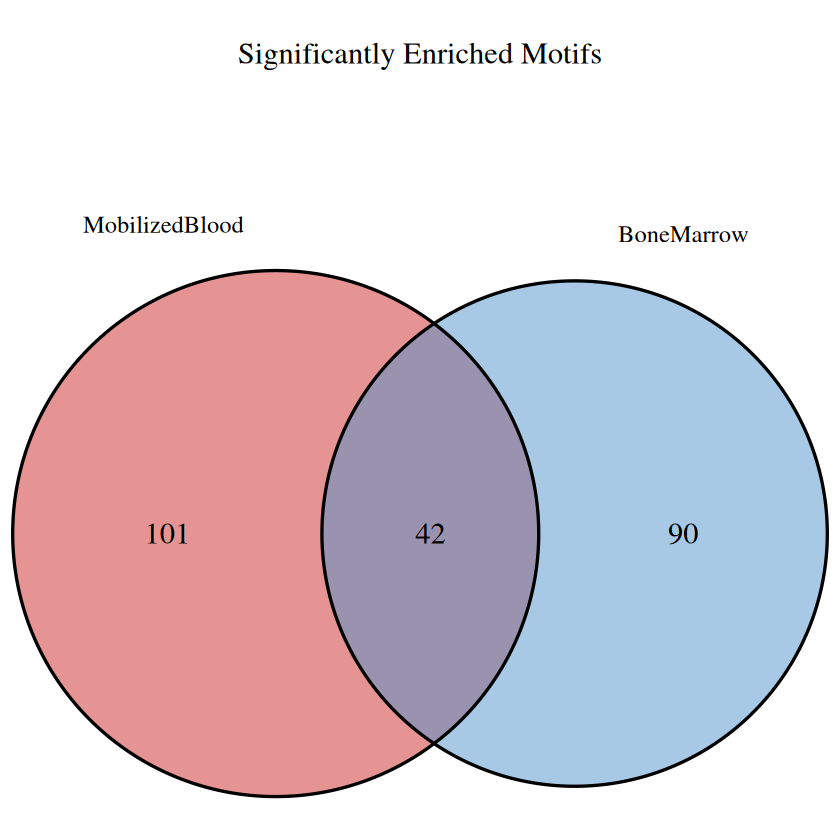

In [ ]:
library(VennDiagram)
library(dplyr)

# Get significant TF names from each tissue
mb_motifs <- df_up %>% 
  filter(mlog10Padj >= -log10(0.05), Enrichment > 1.1) %>% 
  pull(TF) %>% 
  gsub("_[0-9]+$", "", .)

bm_motifs <- df_do %>% 
  filter(mlog10Padj >= -log10(0.05), Enrichment > 1.1) %>% 
  pull(TF) %>% 
  gsub("_[0-9]+$", "", .)

# Create list for Venn diagram
motif_list <- list(
  "MobilizedBlood" = unique(mb_motifs),
  "BoneMarrow" = unique(bm_motifs)
)

# Check counts
cat("MobilizedBlood unique motifs:", length(unique(mb_motifs)), "\n")
cat("BoneMarrow unique motifs:", length(unique(bm_motifs)), "\n")
cat("Overlap:", length(intersect(mb_motifs, bm_motifs)), "\n")


# Create Venn diagram
venn.plot <- venn.diagram(
  x = motif_list,
  filename = NULL,
  
  # Circles
  fill = c("firebrick3", "steelblue3"),
  alpha = 0.5,
  
  # Labels
  category.names = c("MobilizedBlood", "BoneMarrow"),
  cat.cex = 1.2,
  cat.fontface = "bold",
  cat.pos = c(-20, 20),
  cat.dist = c(0.05, 0.05),
  
  # Numbers
  cex = 1.5,
  fontface = "bold",
  
  # Title
  main = "Significantly Enriched Motifs",
  main.cex = 1.5,
  main.fontface = "bold"
)

# Draw
grid.newpage()
grid.draw(venn.plot)

# Save
png(file.path(plots_dir, "Venn_Motif_Overlap_Classic.png"), width = 7, height = 6, units = "in", res = 300)
grid.draw(venn.plot)
dev.off()

# Also show which motifs are in each category
cat("\n=== Motifs ONLY in MobilizedBlood ===\n")
mb_only <- setdiff(mb_motifs, bm_motifs)
print(sort(mb_only))

cat("\n=== Motifs ONLY in BoneMarrow ===\n")
bm_only <- setdiff(bm_motifs, mb_motifs)
print(sort(bm_only))

cat("\n=== Shared Motifs ===\n")
shared <- intersect(mb_motifs, bm_motifs)
print(sort(shared))

In [18]:
# -----------------------------------------------------------------------------
# Create motif_merged from the motif enrichment data
# -----------------------------------------------------------------------------
# Parse and summarize motifs for each tissue
motif_mb_summary <- df_up %>%
  mutate(TF_clean = gsub("_[0-9]+$", "", TF)) %>%
  group_by(TF_clean) %>%
  summarize(
    Enrichment_MB = max(Enrichment, na.rm = TRUE),
    mlog10Padj_MB = max(mlog10Padj, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    Padj_MB = 10^(-mlog10Padj_MB),
    Significant_MB = Padj_MB < 0.05
  )

motif_bm_summary <- df_do %>%
  mutate(TF_clean = gsub("_[0-9]+$", "", TF)) %>%
  group_by(TF_clean) %>%
  summarize(
    Enrichment_BM = max(Enrichment, na.rm = TRUE),
    mlog10Padj_BM = max(mlog10Padj, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    Padj_BM = 10^(-mlog10Padj_BM),
    Significant_BM = Padj_BM < 0.05
  )

# Merge and classify
motif_merged <- motif_mb_summary %>%
  inner_join(motif_bm_summary, by = "TF_clean") %>%
  mutate(
    Log2_Ratio = log2(Enrichment_MB / Enrichment_BM),
    Mean_Enrichment = (Enrichment_MB + Enrichment_BM) / 2,
    Category = case_when(
      Significant_MB & Significant_BM ~ "Shared",
      Significant_MB & !Significant_BM ~ "MB-specific",
      !Significant_MB & Significant_BM ~ "BM-specific",
      TRUE ~ "Not significant"
    )
  )

# Create shared_motifs for later use
shared_motifs <- motif_merged %>%
  filter(Category == "Shared") %>%
  arrange(desc(Mean_Enrichment))

cat("Motif categories:\n")
print(table(motif_merged$Category))

Motif categories:

    BM-specific     MB-specific Not significant          Shared 
             85             126             611              48 


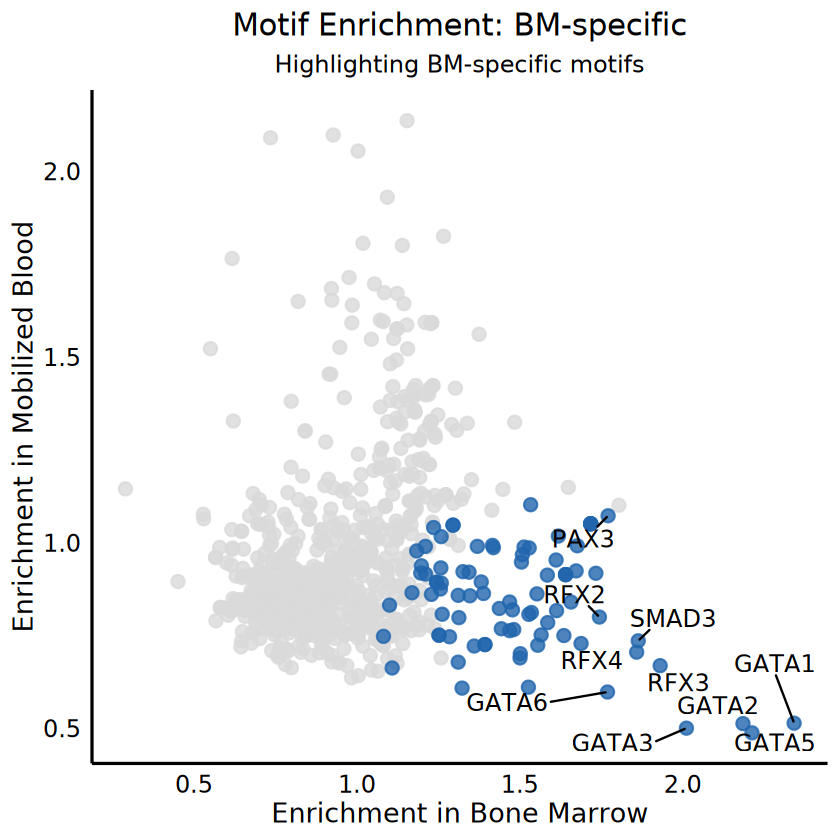

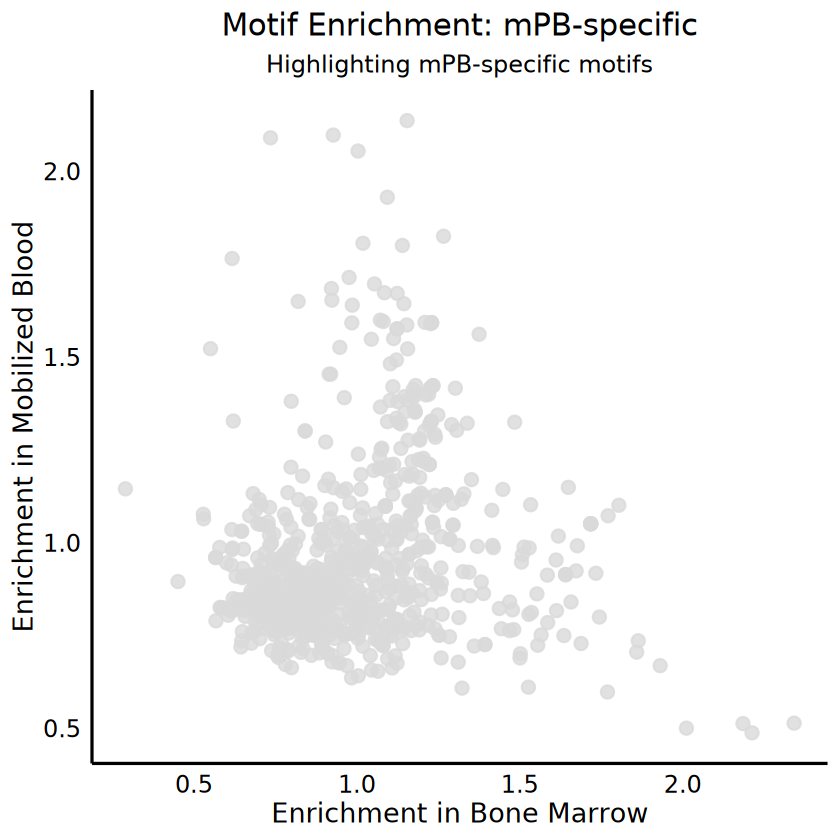

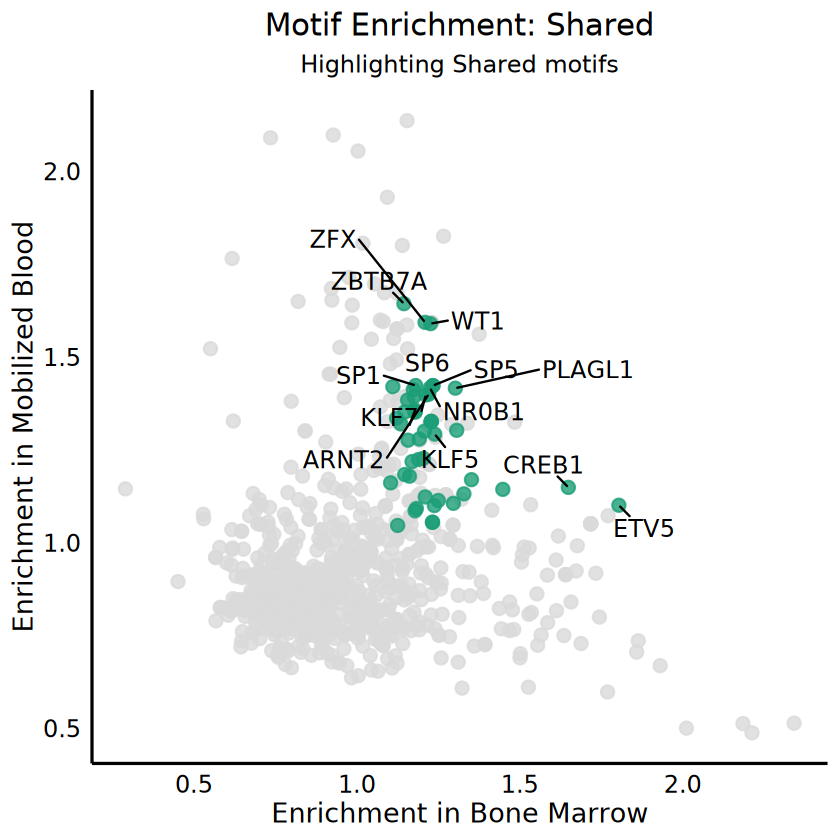

In [19]:
library(ggplot2)
library(dplyr)
library(ggrepel)

# Define the base theme once to ensure consistency across all 3 plots
my_theme <- theme_minimal(base_size = 15) +
  theme(
    legend.position = "none", # Hiding legend as title/subtitle explains the specific focus
    plot.title = element_text(face = "bold", hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 14),
    axis.title = element_text(face = "bold", size = 16),
    axis.text = element_text(size = 14, color = "black"),
    panel.grid = element_blank(),
    axis.line = element_line(color = "black")
  )

# Function to create the plot
plot_highlight <- function(target_category, target_color, label_data) {
  
  # 1. Define colors: Set target to specific color, everything else to light grey
  # We use a named vector matching the levels in your 'Category' column
  color_map <- c(
    "Shared" = "gray85",
    "MB-specific" = "gray85",
    "BM-specific" = "gray85",
    "Not significant" = "gray85"
  )
  # Overwrite the target category with its color
  color_map[target_category] <- target_color
  
  # 2. Reorder data so the highlighted points are plotted LAST (on top)
  plot_df <- motif_merged %>%
    arrange(Category == target_category)
  
  # 3. Plot
  p <- ggplot(plot_df, aes(x = Enrichment_BM, y = Enrichment_MB)) +
    
    geom_point(aes(color = Category), alpha = 0.8, size = 3) +
    
    # Label the provided specific data (Top 20 of the target category)
    geom_text_repel(
      data = label_data,
      aes(label = TF_clean),
      size = 5,
      max.overlaps = 20,
      fontface = "italic",
      box.padding = 0.5
    ) +
    
    scale_color_manual(values = color_map) +
    
    my_theme +
    
    labs(
      title = paste0("Motif Enrichment: ", target_category),
      subtitle = paste0("Highlighting ", target_category, " motifs"),
      x = "Enrichment in Bone Marrow",
      y = "Enrichment in Mobilized Blood"
    )
  
  return(p)
}

# -----------------------------------------------------------------------------
# 1. Plot BM-Specific (Blue)
# -----------------------------------------------------------------------------
# Identify top 20 BM-specific motifs for labeling
top_bm <- motif_merged %>% 
  filter(Category == "BM-specific") %>% 
  arrange(desc(Enrichment_BM)) %>% 
  head(10)

p_bm <- plot_highlight(
  target_category = "BM-specific", 
  target_color = "#2166AC", 
  label_data = top_bm
)

print(p_bm)
ggsave(file.path(plots_dir, "Motif_Scatter_Highlight_BM.pdf"), p_bm, width = 10, height = 8)

# -----------------------------------------------------------------------------
# 2. Plot MB-Specific (Red)
# -----------------------------------------------------------------------------
# Identify top 20 MB-specific motifs for labeling
top_mb <- motif_merged %>% 
  filter(Category == "mPB-specific") %>% 
  arrange(desc(Enrichment_MB)) %>% 
  head(10)

p_mb <- plot_highlight(
  target_category = "mPB-specific", 
  target_color = "#B2182B", 
  label_data = top_mb
)

print(p_mb)
ggsave(file.path(plots_dir, "Motif_Scatter_Highlight_mPB.pdf"), p_mb, width = 10, height = 8)

# -----------------------------------------------------------------------------
# 3. Plot Shared (Green)
# -----------------------------------------------------------------------------
# Define the TFs mentioned in your thesis that you want to highlight
thesis_tfs <- c("ZFX", "KLF5", "KLF7", "SP1")

# Get top 20 shared motifs
top_shared <- shared_motifs %>% head(10)

# Get the thesis-specific TFs from shared motifs (in case they're not in top 20)
thesis_shared <- motif_merged %>%
  filter(Category == "Shared") %>%
  filter(TF_clean %in% thesis_tfs)

# Combine and remove duplicates
label_shared <- bind_rows(top_shared, thesis_shared) %>%
  distinct(TF_clean, .keep_all = TRUE)

p_shared <- plot_highlight(
  target_category = "Shared", 
  target_color = "#1B9E77", 
  label_data = label_shared
)
print(p_shared)
ggsave(file.path(plots_dir, "Motif_Scatter_Highlight_Shared.svg"), p_shared, width = 10, height = 8)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the cowplot package.
  Please report the issue at <https://github.com/wilkelab/cowplot/issues>.”


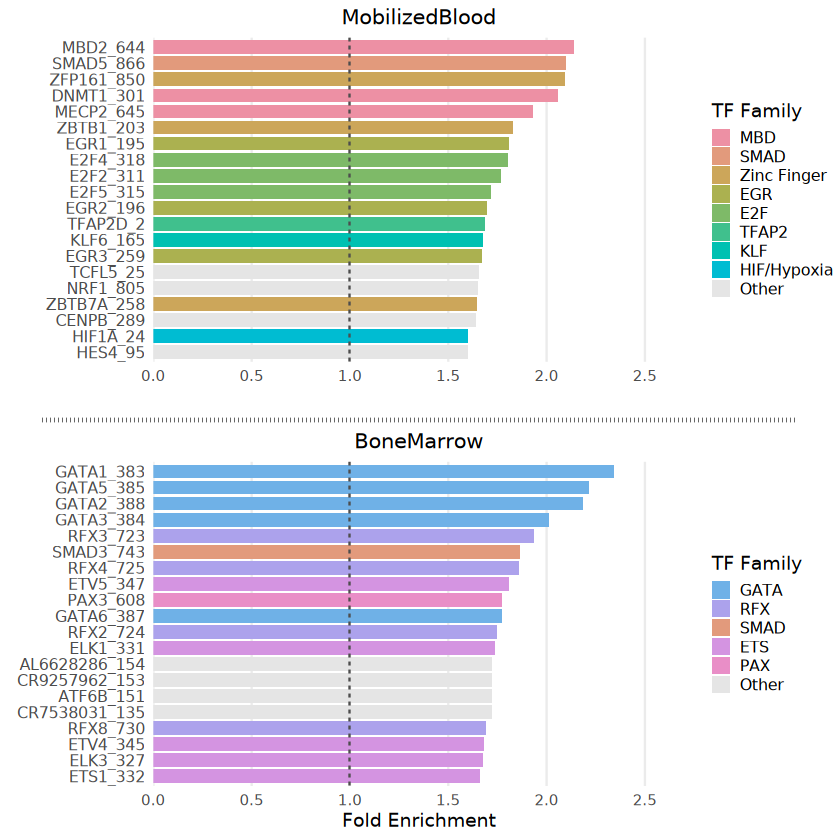

In [20]:
library(ggplot2)
library(dplyr)
library(cowplot)

# 1. Get top 30 motifs from each tissue
top_mb <- df_up %>%
  arrange(desc(Enrichment)) %>%
  head(20) %>%
  mutate(Tissue = "MobilizedBlood")

top_bm <- df_do %>%
  arrange(desc(Enrichment)) %>%
  head(20) %>%
  mutate(Tissue = "BoneMarrow")

# 2. Assign TF families
assign_family <- function(tf) {
  case_when(
    grepl("^GATA", tf) ~ "GATA",
    grepl("^E2F", tf) ~ "E2F",
    grepl("^EGR", tf) ~ "EGR",
    grepl("^KLF", tf) ~ "KLF",
    grepl("^SP[0-9]", tf) ~ "SP",
    grepl("^IRF", tf) ~ "IRF",
    grepl("^SMAD", tf) ~ "SMAD",
    grepl("^TFAP2", tf) ~ "TFAP2",
    grepl("^RFX", tf) ~ "RFX",
    grepl("^CREB", tf) ~ "CREB",
    grepl("^RUNX", tf) ~ "RUNX",
      grepl("^TFDP", tf) ~ "TFDP",
    grepl("^GLI", tf) ~ "GLI",
    grepl("^ELK|^ERG|^FLI|^ETV|^SPI1|^ETS|^ELF|^GABP|^FEV", tf) ~ "ETS",
    grepl("^HIF|^EPAS|^ARNT|^AHR", tf) ~ "HIF/Hypoxia",
    grepl("^FOX", tf) ~ "FOX",
    grepl("^HOX", tf) ~ "HOX",
    grepl("^MEF", tf) ~ "MEF",
    grepl("^NFI|^NFY", tf) ~ "NFI/NFY",
    grepl("^STAT", tf) ~ "STAT",
    grepl("^JUN|^FOS|^AP1", tf) ~ "AP-1",
    grepl("^MYC|^MAX|^MLX", tf) ~ "MYC/MAX",
    grepl("^PAX", tf) ~ "PAX",
    grepl("^POU|^OCT", tf) ~ "POU",
    grepl("^SOX", tf) ~ "SOX",
    grepl("^TBX", tf) ~ "TBX",
      grepl("^MBD2|^DNMT1|^MECP2", tf) ~ "MBD",
    grepl("^ZIC|^ZNF|^ZSCAN|^PRDM|^ZFP|^ZBTB|^ZFX", tf) ~ "Zinc Finger",
    TRUE ~ "Other"
  )
}

top_mb$Family <- assign_family(top_mb$TF)
top_bm$Family <- assign_family(top_bm$TF)

# 3. Coloring
all_families <- unique(c(top_mb$Family, top_bm$Family))
families_no_other <- setdiff(all_families, "Other")
n <- length(families_no_other)

# Define the named color vector
family_colors <- setNames(hcl.colors(n, palette = "Set 2"), families_no_other)
family_colors["Other"] <- "grey90"

# 4. Helper function to reorder Family factor LOCALLY based on rank
reorder_family_local <- function(df) {
  family_ranks <- df %>%
    arrange(desc(Enrichment)) %>%
    mutate(Rank = row_number()) %>%
    group_by(Family) %>%
    summarise(Best_Rank = min(Rank)) %>%
    arrange(Best_Rank)
  
  ordered_levels <- family_ranks$Family
  
  # Ensure "Other" is always last if present
  if ("Other" %in% ordered_levels) {
    ordered_levels <- c(setdiff(ordered_levels, "Other"), "Other")
  }
  
  # Return the factor with new levels
  factor(df$Family, levels = ordered_levels)
}

# Apply independent ordering
top_mb$Family <- reorder_family_local(top_mb)
top_bm$Family <- reorder_family_local(top_bm)

# Also order the TFs themselves for the Y-axis
top_mb <- top_mb %>% arrange(Enrichment) %>% mutate(TF_ordered = factor(TF, levels = TF))
top_bm <- top_bm %>% arrange(Enrichment) %>% mutate(TF_ordered = factor(TF, levels = TF))

# 5. Create Plot 1 (Mobilized Blood)
x_max <- 2.7

p_mb <- ggplot(top_mb, aes(x = Enrichment, y = TF_ordered, fill = Family)) +
  geom_bar(stat = "identity", width = 0.8) +
  geom_vline(xintercept = 1, lty = "dashed", color = "grey30") +
  scale_fill_manual(values = family_colors, drop = TRUE) +
  scale_x_continuous(limits = c(0, x_max), expand = c(0, 0)) +
  labs(x = "", y = "", fill = "TF Family", subtitle = "MobilizedBlood") +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 9),
    plot.subtitle = element_text(face = "bold", size = 12, hjust = 0.5),
    legend.position = "right",
    legend.title = element_text(face = "bold"),
    legend.text = element_text(size = 9),
    # Reduce key size to save space if list is long
    legend.key.size = unit(0.4, "cm"), 
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank()
  ) +
  guides(fill = guide_legend(ncol = 1))

# 6. Create Plot 2 (Bone Marrow)
p_bm <- ggplot(top_bm, aes(x = Enrichment, y = TF_ordered, fill = Family)) +
  geom_bar(stat = "identity", width = 0.8) +
  geom_vline(xintercept = 1, lty = "dashed", color = "grey30") +
  scale_fill_manual(values = family_colors, drop = TRUE) +
  scale_x_continuous(limits = c(0, x_max), expand = c(0, 0)) +
  labs(x = "Fold Enrichment", y = "", fill = "TF Family", subtitle = "BoneMarrow") +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 9),
    plot.subtitle = element_text(face = "bold", size = 12, hjust = 0.5),
    legend.position = "right",
    legend.title = element_text(face = "bold"),
    legend.text = element_text(size = 9),
    legend.key.size = unit(0.4, "cm"),
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank()
  ) +
  guides(fill = guide_legend(ncol = 1))

# 7. Combine
p_combined <- plot_grid(
  p_mb, 
  NULL,
  p_bm, 
  ncol = 1, 
  rel_heights = c(1, 0.02, 1),
  align = "v",
  axis = "lr"
)

p_final <- ggdraw(p_combined) +
  draw_line(x = c(0.05, 0.95), y = c(0.5, 0.5), linetype = "dotted", size = 1, color = "grey40")

print(p_final)
ggsave(file.path(plots_dir, "Barplot_Top30_Motifs_IndependentLegends.pdf"), p_final, width = 11, height = 15)

In [21]:
# Gets significant TF names from each tissue WITH enrichment filter
mb_motifs <- df_up %>% 
  filter(mlog10Padj > -log10(0.05), Enrichment > 1.1) %>%
  pull(TF) %>% 
  gsub("_[0-9]+$", "", .)  # Remove number suffix

bm_motifs <- df_do %>% 
  filter(mlog10Padj > -log10(0.05), Enrichment > 1.1) %>%
  pull(TF) %>% 
  gsub("_[0-9]+$", "", .)  # Remove number suffix

# Creates list for Venn diagram
motif_list <- list(
  "MobilizedBlood" = unique(mb_motifs),
  "BoneMarrow" = unique(bm_motifs)
)

# Checks counts
cat("MobilizedBlood unique motifs (Enrichment > 1.1):", length(unique(mb_motifs)), "\n")
cat("BoneMarrow unique motifs (Enrichment > 1.1):", length(unique(bm_motifs)), "\n")
cat("Overlap:", length(intersect(mb_motifs, bm_motifs)), "\n")

# Shows which motifs are in each category
cat("\n=== Motifs ONLY in MobilizedBlood (Enrichment > 1.1) ===\n")
mb_only <- setdiff(mb_motifs, bm_motifs)
print(sort(mb_only))

cat("\n=== Motifs ONLY in BoneMarrow (Enrichment > 1.1) ===\n")
bm_only <- setdiff(bm_motifs, mb_motifs)
print(sort(bm_only))

cat("\n=== Shared Motifs (Enrichment > 1.1) ===\n")
shared <- intersect(mb_motifs, bm_motifs)
print(sort(shared))

MobilizedBlood unique motifs (Enrichment > 1.1): 143 
BoneMarrow unique motifs (Enrichment > 1.1): 132 
Overlap: 42 

=== Motifs ONLY in MobilizedBlood (Enrichment > 1.1) ===
  [1] "AHR"             "AHRR"            "ARNT"            "ARNTL"          
  [5] "ARNTL2"          "ATF3"            "ATF6"            "BHLHE40"        
  [9] "BHLHE41"         "C13orf38SOHLH2"  "CENPB"           "CGBP"           
 [13] "CTCFL"           "CXXC1"           "DNMT1"           "E2F1"           
 [17] "E2F2"            "E2F4"            "E2F5"            "E2F6"           
 [21] "E4F1"            "EGR1"            "EGR2"            "EGR3"           
 [25] "EGR4"            "ENSG00000250542" "ENSG00000250811" "EPAS1"          
 [29] "ESR1"            "GCM2"            "GLIS1"           "GLIS2"          
 [33] "GLIS3"           "HES1"            "HES4"            "HES5"           
 [37] "HES7"            "HEY1"            "HEY2"            "HIF1A"          
 [41] "HINFP"           "ID1"             "ID

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-b34fd1cf4c8-Date-2026-01-20_Time-23-26-45.55458.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2026-01-20 23:26:46.631361 : Matching Known Biases, 0.007 mins elapsed.

2026-01-20 23:26:48.986013 : Computing Pairwise Tests (1 of 1), 0.046 mins elapsed.

Pairwise Test MobilizedBlood : Seqnames chr1

Pairwise Test MobilizedBlood : Seqnames chr10

Pairwise Test MobilizedBlood : Seqnames chr11

Pairwise Test MobilizedBlood : Seqnames chr12

Pairwise Test MobilizedBlood : Seqnames chr13

Pairwise Test MobilizedBlood : Seqnames chr14

Pairwise Test MobilizedBlood : Seqnames chr15

Pairwise Test MobilizedBlood : Seqnames chr16

Pairwise Test MobilizedBlood : Seqnames chr17

Pairwise Test MobilizedBlood : Seqnames chr18

Pairwise Test MobilizedBlood : Seqnames chr19

Pairwise Test MobilizedBlood : Seqnames chr2

Pairwise Test MobilizedBlood : Seqnames chr20

Pairwise Test MobilizedBlood : 


GENE ACCESSIBILITY SUMMARY
Total genes analyzed: 24919
Significant MobilizedBlood-enriched (FDR≤0.05, Log2FC≥0.5): 2928
Significant BoneMarrow-enriched (FDR≤0.05, Log2FC≤-0.5): 1219
Shared accessible (FDR≤0.05, |Log2FC|<0.5): 13862
Non-significant (FDR>0.05): 7076


Warning message:
“Removed 21 rows containing missing values or values outside the scale range (`geom_point_rast()`).”
Warning message:
“Removed 21 rows containing missing values or values outside the scale range (`geom_point_rast()`).”
Warning message:
“Removed 21 rows containing missing values or values outside the scale range (`geom_point_rast()`).”
Warning message:
“Removed 21 rows containing missing values or values outside the scale range (`geom_point_rast()`).”


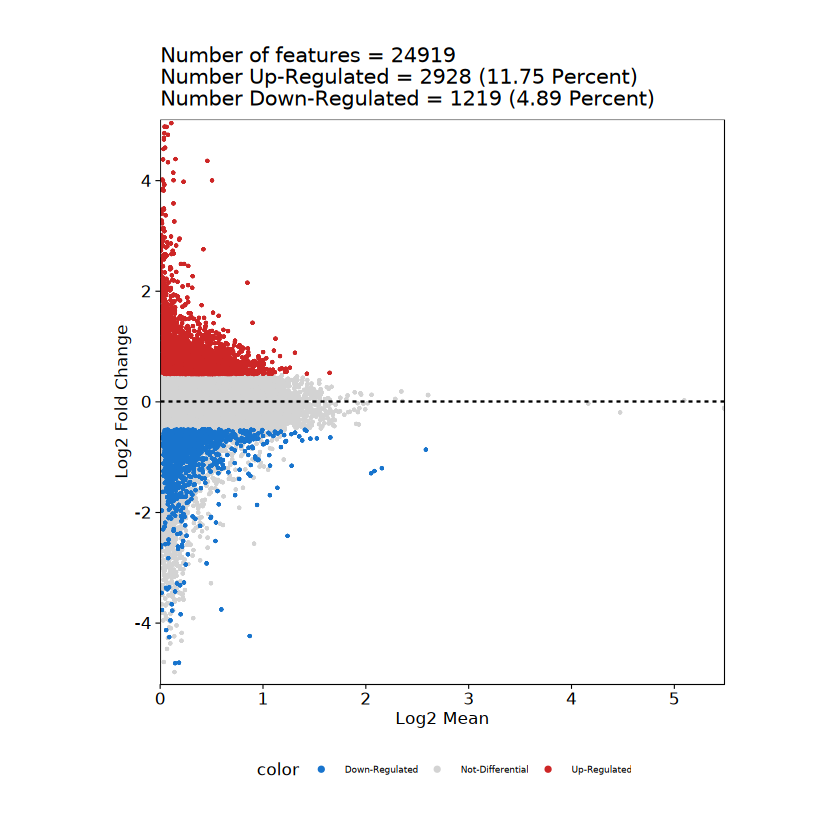


=== Gene files exported ===
- Genes_SIGNIFICANT_MobilizedBlood.csv
- Genes_SIGNIFICANT_BoneMarrow.csv
- Genes_MA_Plot.pdf
- Genes_Volcano_Plot.pdf


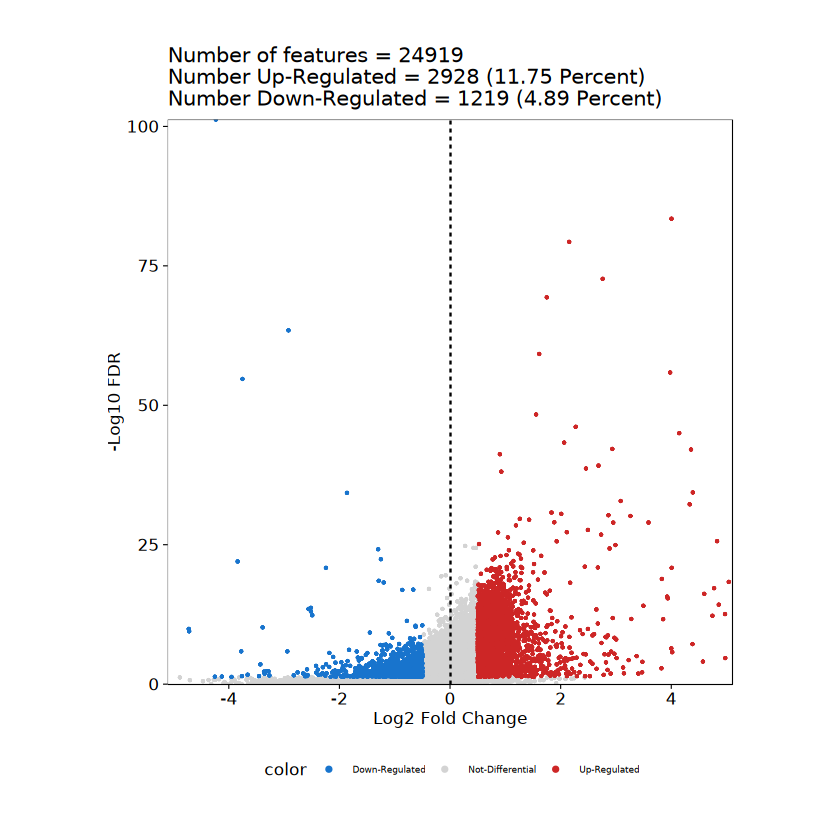

In [22]:
#===========================================================================
# GENE ACCESSIBILITY ANALYSIS - COMPLETE WITH RAW VALUES TESTESTEST
#===========================================================================

# Define cutoffs
fdr_cutoff <- 0.05
log2fc_cutoff <- 0.5

# Get marker genes between tissues
markersGenes <- getMarkerFeatures(
  ArchRProj = proj_hsc,
  useMatrix = "GeneScoreMatrix",
  groupBy = "Tissue",
  testMethod = "wilcoxon",
  bias = c("TSSEnrichment", "log10(nFrags)"),
  useGroups = "MobilizedBlood",
  bgdGroups = "BoneMarrow"
)

# Extract all assays from markersGenes
geneInfo <- as.data.frame(rowData(markersGenes))
mb_all <- cbind(geneInfo, data.frame(
  Mean_MobilizedBlood = assay(markersGenes, "Mean")[,1],
  Mean_BoneMarrow = assay(markersGenes, "MeanBGD")[,1],
  Log2FC = assay(markersGenes, "Log2FC")[,1],
  FDR = assay(markersGenes, "FDR")[,1],
  MeanDiff = assay(markersGenes, "MeanDiff")[,1],
  AUC = assay(markersGenes, "AUC")[,1]
))

# Categorize genes
sig_mb_genes <- mb_all[mb_all$FDR < fdr_cutoff & mb_all$Log2FC > log2fc_cutoff, ]
sig_bm_genes <- mb_all[mb_all$FDR < fdr_cutoff & mb_all$Log2FC < -log2fc_cutoff, ]
shared_genes <- mb_all[mb_all$FDR < fdr_cutoff & abs(mb_all$Log2FC) < log2fc_cutoff, ]
nonsig_genes <- mb_all[mb_all$FDR > fdr_cutoff, ]

cat("\n==================================================\n")
cat("GENE ACCESSIBILITY SUMMARY\n")
cat("==================================================\n")
cat(sprintf("Total genes analyzed: %d\n", nrow(mb_all)))
cat(sprintf("Significant MobilizedBlood-enriched (FDR≤%.2f, Log2FC≥%g): %d\n", 
            fdr_cutoff, log2fc_cutoff, nrow(sig_mb_genes)))
cat(sprintf("Significant BoneMarrow-enriched (FDR≤%.2f, Log2FC≤-%g): %d\n", 
            fdr_cutoff, log2fc_cutoff, nrow(sig_bm_genes)))
cat(sprintf("Shared accessible (FDR≤%.2f, |Log2FC|<%g): %d\n", 
            fdr_cutoff, log2fc_cutoff, nrow(shared_genes)))
cat(sprintf("Non-significant (FDR>%.2f): %d\n", fdr_cutoff, nrow(nonsig_genes)))

#===========================================================================
# GENE PLOTS
#===========================================================================
plots_dir <- file.path(proj_hsc@projectMetadata$outputDirectory, "Plots")
if(!dir.exists(plots_dir)) dir.create(plots_dir, recursive = TRUE)

pMA_genes <- plotMarkers(seMarker = markersGenes, 
                         name = "MobilizedBlood", 
                         cutOff = "FDR < 0.05 & abs(Log2FC) > 0.5", 
                         plotAs = "MA")
ggsave(file.path(plots_dir, "Genes_MA_Plot.pdf"), pMA_genes, width = 5, height = 5)
print(pMA_genes)

pVolcano_genes <- plotMarkers(seMarker = markersGenes, 
                              name = "MobilizedBlood", 
                              cutOff = "FDR < 0.05 & abs(Log2FC) > 0.5", 
                              plotAs = "Volcano")
ggsave(file.path(plots_dir, "Genes_Volcano_Plot.pdf"), pVolcano_genes, width = 5, height = 5)
print(pVolcano_genes)

#===========================================================================
# EXPORT GENE LISTS
#===========================================================================
write.csv(sig_mb_genes, file.path(plots_dir, "Genes_SIGNIFICANT_MobilizedBlood.csv"), row.names = FALSE)
write.csv(sig_bm_genes, file.path(plots_dir, "Genes_SIGNIFICANT_BoneMarrow.csv"), row.names = FALSE)

cat("\n=== Gene files exported ===\n")
cat("- Genes_SIGNIFICANT_MobilizedBlood.csv\n")
cat("- Genes_SIGNIFICANT_BoneMarrow.csv\n")
cat("- Genes_MA_Plot.pdf\n")
cat("- Genes_Volcano_Plot.pdf\n")

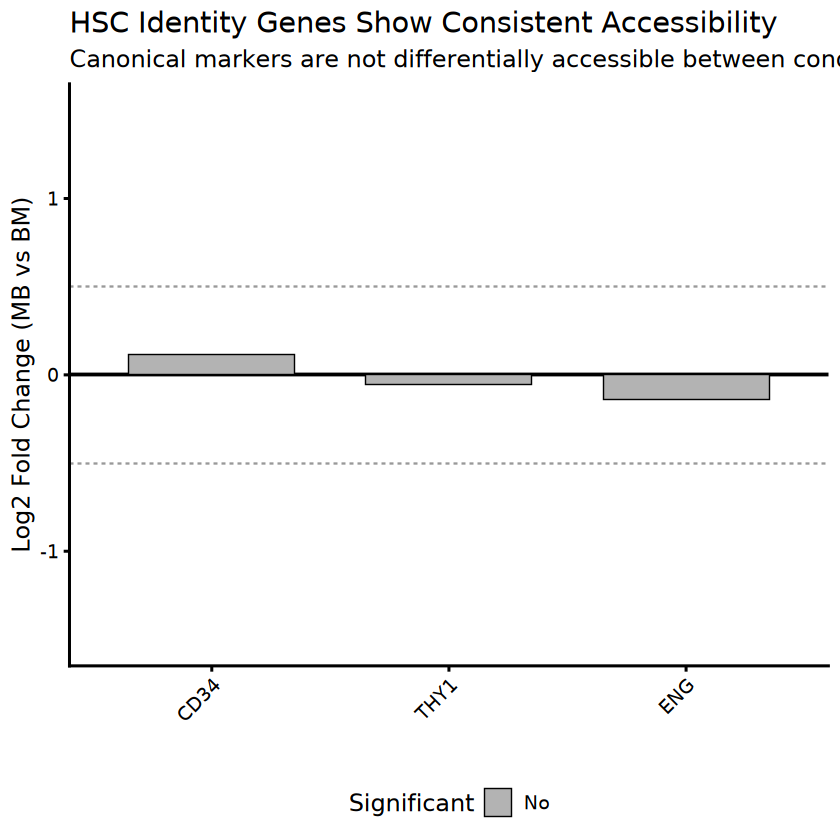

In [23]:
#===========================================================================
# SLIDE 1: HSC IDENTITY MAINTAINED
#===========================================================================

# Reuses: hsc_markers, plots_dir from UMAP section

hsc_stats <- mb_all %>%
  filter(name %in% hsc_markers) %>%
  mutate(
    Significant = ifelse(FDR < 0.05 & abs(Log2FC) > 0.5, "Yes", "No"),
    name = factor(name, levels = hsc_markers)
  ) %>%
  arrange(name)

p_hsc_identity <- ggplot(hsc_stats, aes(x = name, y = Log2FC, fill = Significant)) +
  geom_hline(yintercept = 0, linetype = "solid", color = "black", linewidth = 0.8) +
  geom_hline(yintercept = c(-0.5, 0.5), linetype = "dashed", color = "grey60", linewidth = 0.5) +
  geom_col(width = 0.7, color = "black", linewidth = 0.3) +
  scale_fill_manual(values = c("No" = "grey70", "Yes" = "firebrick3")) +
  labs(
    title = "HSC Identity Genes Show Consistent Accessibility",
    subtitle = "Canonical markers are not differentially accessible between conditions",
    x = "", y = "Log2 Fold Change (MB vs BM)", fill = "Significant"
  ) +
  theme_classic(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, face = "italic"),
    legend.position = "bottom",
    panel.grid = element_blank()
  ) +
  ylim(-1.5, 1.5)

ggsave(file.path(plots_dir, "Slide1_HSC_Identity.png"), p_hsc_identity, width = 8, height = 5)
print(p_hsc_identity)


Attache Paket: ‘tidyr’


Die folgenden Objekte sind maskiert von ‘package:Matrix’:

    expand, pack, unpack


Das folgende Objekt ist maskiert ‘package:S4Vectors’:

    expand


Das folgende Objekt ist maskiert ‘package:magrittr’:

    extract




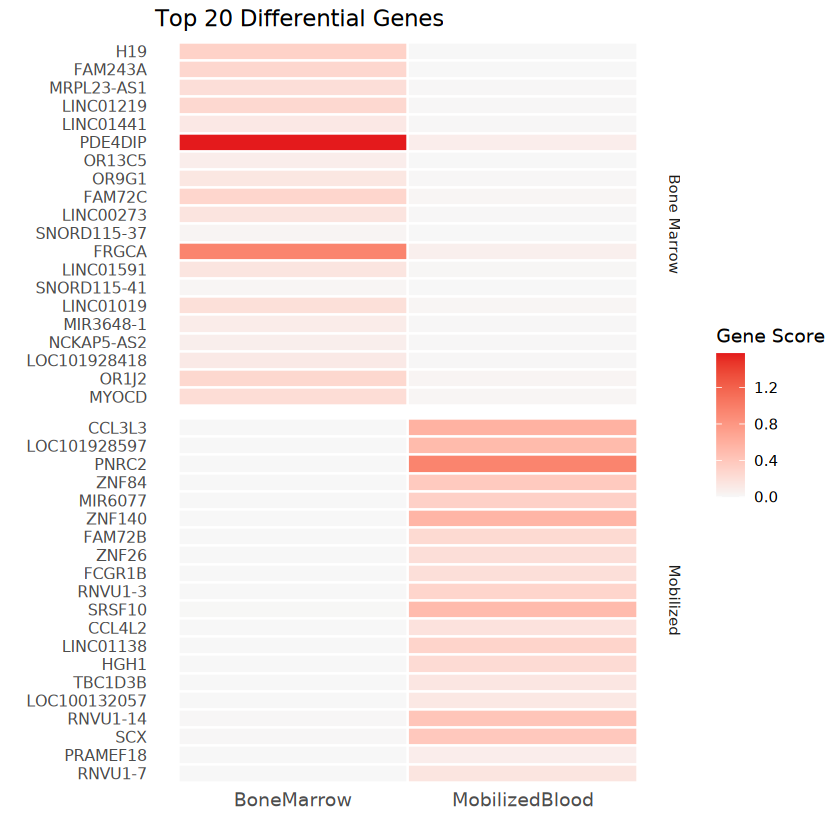

In [24]:
library(tidyr)
mb_clean <- mb_all %>%
  arrange(FDR) %>%
  distinct(name, .keep_all = TRUE)

# 2. Selektion der Gene

# A. Mobilized Marker (Log2FC > 1)
# Sortierung: Absteigend nach dem Betrag (|Log2FC|)
top_mb <- mb_clean %>%
  filter(FDR < 0.05 & Log2FC > 0.5) %>%
  arrange(desc(abs(Log2FC))) %>% 
  head(20) %>%
  mutate(Group = "Mobilized")

# B. Bone Marrow Marker (Log2FC < -1)
top_bm <- mb_clean %>%
  filter(FDR < 0.05 & Log2FC < -0.5) %>%
  arrange(desc(abs(Log2FC))) %>% 
  head(20) %>%
  mutate(Group = "Bone Marrow")

# 3. Zusammenfügen
top_genes <- rbind(top_mb, top_bm)
top_genes$name <- factor(top_genes$name, levels = rev(top_genes$name))

# 4. Umformen für ggplot
plot_data <- top_genes %>%
  select(name, Group, Mean_MobilizedBlood, Mean_BoneMarrow) %>%
  pivot_longer(cols = c(Mean_MobilizedBlood, Mean_BoneMarrow),
               names_to = "Condition",
               values_to = "Accessibility")

# Labels säubern
plot_data$Condition <- gsub("Mean_", "", plot_data$Condition)

# 5. Plotten
p_heat <- ggplot(plot_data, aes(x = Condition, y = name, fill = Accessibility)) +
  geom_tile(color = "white", lwd = 0.5) +
  
  scale_fill_gradient(low = "grey97", high = "#E41A1C", name = "Gene Score") +
  
  facet_grid(Group ~ ., scales = "free_y", space = "free_y") +
  
  labs(title = "Top 20 Differential Genes",
       x = "", y = "") +
  
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 9),
    axis.text.x = element_text(size = 11, face = "bold"),
    

    
    panel.grid = element_blank(),
    legend.position = "right"
  )

print(p_heat)
ggsave(file.path(plots_dir, "Heatmap_Top20_Sorted_AbsFC.pdf"), p_heat, width = 6, height = 13)

In [25]:
#===========================================================================
# EXPORT BEREINIGTER HINTERGRUND (CLEAN BACKGROUND)
#===========================================================================

detected_in_hsc <- mb_all[mb_all$Mean_MobilizedBlood > 0 | mb_all$Mean_BoneMarrow > 0, ]

cat("\n=== Bereinigung des Hintergrunds ===\n")
cat("Alle annotierten Gene (inkl. anderer Zelltypen): ", nrow(mb_all), "\n")
cat("Gene mit Aktivität in HSCs (Bereinigter BG):     ", nrow(detected_in_hsc), "\n")
cat("Entfernte 'Geister-Gene':                        ", nrow(mb_all) - nrow(detected_in_hsc), "\n")

# 2. Speichern der neuen, sauberen Liste
writeLines(detected_in_hsc$name, file.path(plots_dir, "GeneList_Background_Universe_CLEAN.txt"))

cat("\nDatei gespeichert: GeneList_Background_Universe_CLEAN.txt\n")


=== Bereinigung des Hintergrunds ===
Alle annotierten Gene (inkl. anderer Zelltypen):  24919 
Gene mit Aktivität in HSCs (Bereinigter BG):      24753 
Entfernte 'Geister-Gene':                         166 

Datei gespeichert: GeneList_Background_Universe_CLEAN.txt


In [26]:
# Identification of potential Regulators

In [27]:
proj_hsc <- addBgdPeaks(proj_hsc)

Identifying Background Peaks!



In [ ]:
proj_hsc <- addDeviationsMatrix(
  ArchRProj = proj_hsc, 
  peakAnnotation = "Motif",
  force = TRUE
)

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-b34f162a8cad-Date-2026-01-20_Time-23-28-35.609538.log
If there is an issue, please report to github with logFile!

2026-01-20 23:28:42.592642 : Batch Execution w/ safelapply!, 0 mins elapsed.



In [ ]:
plotVarDev <- getVarDeviations(proj_hsc, name = "MotifMatrix", plot = TRUE)
plotVarDev

In [ ]:
seGroupMotif <- getGroupSE(ArchRProj = proj_hsc, useMatrix = "MotifMatrix", groupBy = "Tissue")
seGroupMotif

In [ ]:
#===========================================================================
# EXTRACT & STORE MOTIF DEVIATIONS (CHROMVAR)
#===========================================================================

# 1. GET THE VARIABILITY TABLE (The "Ranking")
# This gets the stats on which motifs are most variable across all cells
varDevObj <- getVarDeviations(
  ArchRProj = proj_hsc, 
  name = "MotifMatrix", 
  plot = FALSE
)

# Convert to standard dataframe for export
df_var <- as.data.frame(varDevObj)
df_var$TF <- df_var$name
df_var <- df_var[, c("name", "combinedVars", "combinedMeans", "rank", "idx")]

# Save the Variability Rank List
write.csv(df_var, file.path(plots_dir, "Motifs_Global_Variability_Rank.csv"), row.names = FALSE)

In [ ]:
seZ <- seGroupMotif[rowData(seGroupMotif)$seqnames=="z",]
rowData(seZ)$maxDelta <- lapply(seq_len(ncol(seZ)), function(x){
  rowMaxs(assay(seZ) - assay(seZ)[,x])
}) %>% Reduce("cbind", .) %>% rowMaxs

In [ ]:
corGSM_MM <- correlateMatrices(
    ArchRProj = proj_hsc,
    useMatrix1 = "GeneScoreMatrix",
    useMatrix2 = "MotifMatrix",
    reducedDims = "Harmony_Sample_Analysis"
)

In [ ]:
corGSM_MM$maxDelta <- rowData(seZ)[match(corGSM_MM$MotifMatrix_name, rowData(seZ)$name), "maxDelta"]
corGSM_MM <- corGSM_MM[order(abs(corGSM_MM$cor), decreasing = TRUE), ]
corGSM_MM <- corGSM_MM[which(!duplicated(gsub("\\-.*","",corGSM_MM[,"MotifMatrix_name"]))), ]
corGSM_MM$TFRegulator <- "NO"
corGSM_MM$TFRegulator[which(corGSM_MM$cor > 0.4 & corGSM_MM$padj < 0.05 & corGSM_MM$maxDelta > quantile(corGSM_MM$maxDelta, 0.75))] <- "YES"
sort(corGSM_MM[corGSM_MM$TFRegulator=="YES",1])

In [ ]:
# -----------------------------------------------------------------------------
# Add MB vs BM z-score difference to corGSM_MM
# -----------------------------------------------------------------------------
# Get column indices for each tissue
mb_idx <- which(colnames(assay(seZ)) == "MobilizedBlood")
bm_idx <- which(colnames(assay(seZ)) == "BoneMarrow")

# Calculate difference (MB - BM) for each motif
MB_vs_BM_diff <- assay(seZ)[, mb_idx] - assay(seZ)[, bm_idx]
names(MB_vs_BM_diff) <- rowData(seZ)$name

# Add to correlation results
corGSM_MM$MB_vs_BM_diff <- MB_vs_BM_diff[match(corGSM_MM$MotifMatrix_name, names(MB_vs_BM_diff))]

# -----------------------------------------------------------------------------
# Get motifs enriched in MB peaks
# -----------------------------------------------------------------------------
motif_enriched_mb <- df_up %>%
  mutate(TF_clean = gsub("_[0-9]+$", "", TF)) %>%
  filter(mlog10Padj >= -log10(0.05) & Enrichment > 1.1) %>%
  pull(TF_clean) %>%
  unique()

# -----------------------------------------------------------------------------
# Apply ALL filters for validated MB activators
# -----------------------------------------------------------------------------
corGSM_MM$Label <- gsub("[_\\-].*", "", corGSM_MM$MotifMatrix_name)

corGSM_MM$TFRegulator_MB <- "NO"
corGSM_MM$TFRegulator_MB[which(
  corGSM_MM$cor > 0.4 &
  corGSM_MM$padj < 0.05 &
  corGSM_MM$maxDelta > quantile(corGSM_MM$maxDelta, 0.75) &
  corGSM_MM$MB_vs_BM_diff > 0 &
  corGSM_MM$Label %in% motif_enriched_mb
)] <- "YES"

# -----------------------------------------------------------------------------
# Check results
# -----------------------------------------------------------------------------
validated_mb <- corGSM_MM[corGSM_MM$TFRegulator_MB == "YES", ]

cat("\n==================================================\n")
cat("VALIDATED MB ACTIVATORS\n")
cat("==================================================\n")
cat("Count:", nrow(validated_mb), "\n\n")
print(validated_mb[, c("Label", "cor", "padj", "maxDelta", "MB_vs_BM_diff")])

# -----------------------------------------------------------------------------
# Plot
# -----------------------------------------------------------------------------
plotDF <- data.frame(corGSM_MM)

plotDF$Category <- case_when(
  plotDF$TFRegulator_MB == "YES" ~ "MB_Activator",
  plotDF$TFRegulator == "YES" ~ "Positive_Reg_Not_MB",
  TRUE ~ "Other"
)

label_data <- subset(plotDF, TFRegulator_MB == "YES")

p <- ggplot(plotDF, aes(cor, maxDelta, color = Category)) +
  geom_point(alpha = 0.7) + 
  theme_ArchR() +
  geom_vline(xintercept = 0, lty = "dashed") + 
  scale_color_manual(
    values = c(
      "MB_Activator" = "firebrick3",
      "Positive_Reg_Not_MB" = "gray50",
      "Other" = "gray80"
    ),
    labels = c(
      "MB_Activator" = "Validated MB Activator",
      "Positive_Reg_Not_MB" = "Positive Regulator (not MB-specific)",
      "Other" = "Other"
    )
  ) +
  xlab("Correlation To Gene Score") +
  ylab("Max TF Motif Delta") +
  scale_y_continuous(expand = c(0,0), limits = c(0, max(plotDF$maxDelta)*1.15)) +
  geom_label_repel(
    data = label_data,
    aes(label = Label), 
    color = "firebrick3",
    size = 4,
    min.segment.length = 0,
    box.padding = 0.5,
    max.overlaps = 20
  ) +
  labs(
    title = "Validated TF Activators in Mobilized Blood HSCs",
    subtitle = "Motif enrichment + Correlation + ChromVAR z-score higher in MB"
  )

print(p)
ggsave(file.path(plots_dir, "TF_Activators_Validated_MB.pdf"), p, width = 10, height = 8)

# Export
write.csv(validated_mb, file.path(plots_dir, "TF_Activators_Validated_MB.csv"), row.names = FALSE)

In [ ]:
# -----------------------------------------------------------------------------
# Footprinting for Validated Regulators
# -----------------------------------------------------------------------------

# Get TF names from validated regulators
validated_tfs <- unique(validated_mb$Label)
cat("Validated regulators:", paste(validated_tfs, collapse = ", "), "\n")

# Converts sig_mb_peaks to GRanges
mb_peak_gr <- GRanges(
  seqnames = sig_mb_peaks$seqnames,
  ranges = IRanges(start = sig_mb_peaks$start, end = sig_mb_peaks$end)
)

cat("Number of MB-upregulated peaks:", length(mb_peak_gr), "\n")

# Gets all motif positions
all_positions <- getPositions(proj_hsc)

# Finds motif names for each validated TF and subset to MB peaks
motifPositions_MB <- lapply(validated_tfs, function(tf) {
  # Find the motif name matching this TF
  motif_name <- grep(paste0("^", tf, "_"), names(all_positions), value = TRUE)[1]
  
  if (is.na(motif_name)) {
    cat("Warning: No motif found for", tf, "\n")
    return(NULL)
  }
  
  # Gets positions and subset to MB peaks
  positions <- all_positions[[motif_name]]
  positions_in_mb <- subsetByOverlaps(positions, mb_peak_gr)
  
  cat(tf, "sites in MB-up peaks:", length(positions_in_mb), "\n")
  return(positions_in_mb)
})

names(motifPositions_MB) <- validated_tfs
motifPositions_MB <- GRangesList(motifPositions_MB[!sapply(motifPositions_MB, is.null)])

# Computes footprints
seFoot_MB <- getFootprints(
  ArchRProj = proj_hsc, 
  positions = motifPositions_MB, 
  groupBy = "Tissue"
)

# Plot
plotFootprints(
  seFoot = seFoot_MB,
  ArchRProj = proj_hsc,
  normMethod = "Subtract",
  plotName = "Footprints-Validated-Regulators",
  addDOC = FALSE,
  smoothWindow = 5,
  pal = c("BoneMarrow" = "#29306B", "MobilizedBlood" = "#D51F26")
)

# Save
saveRDS(seFoot_MB, file.path(plots_dir, "Footprints_Validated_Regulators.rds"))